<a href="https://colab.research.google.com/github/AndersonAraujoX/Rede_Complexa/blob/main/Rede_complexas_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relat√≥rio final

Nome: Anderson Araujo de Oliveira

N USP¬∞ 11371311




# Bibliotecas Utilizadas



In [ ]:
!pip install algorithmx #Biblioteca montar grafos em javascript
!pip install igraph #Biblioteca metricas de rede neurais mais otimizada
!pip install karateclub #biblioteca para obter algumas fun√ß√µes de classifica√ß√µes de n√≥
!pip install umap-learn #auxilia kakrateclub

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import random as random
from algorithmx import jupyter_canvas
from google.colab import output
from networkx.algorithms.community.centrality import girvan_newman
from sklearn.decomposition import PCA
from scipy.linalg import eigh
import operator
#from algorithmx import jupyter_canvas
from google.colab import output
import time
import collections
from sklearn.cluster import DBSCAN
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

#bibliotecas para os classificadores
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

output.enable_custom_widget_manager()

In [ ]:
#cuidado algumas partes do c√≥digo n√£o funciona se rodar essa parte!

class GraphAPI():
    def __init__(self, graph): self.data = graph
    def __len__(self): return self.count_nodes() + self.count_edges()

    def _isnx(self): return isinstance(self.data, nx.Graph)
    def _isig(self): return isinstance(self.data, ig.Graph)
    def _isint(self, var): return isinstance(var, int)
    def _islst(self, var): return isinstance(var, list)
    def _istpl(self, var): return isinstance(var, tuple)

    def nodes(self):
        if   self._isnx(): return list(self.data.nodes)
        elif self._isig(): return list([ v.index for v in self.data.vs ])
        else:              return []

    def edges(self):
        if   self._isnx(): return list(self.data.edges)
        elif self._isig(): return list([ e.tuple for e in self.data.es ])
        else:              return []

    def neighbors(self, u):
        if   self._isnx(): return list(self.data.neighbors(u))
        elif self._isig(): return self.data.neighbors(u)
        else:              return []

    def to_adj_matrix(self):
        if   self._isnx(): return nx.to_numpy_array(self.data)
        elif self._isig(): return np.array(list(self.data.get_adjacency()))
        else:              return np.array([[]])

    def degree(self, param=None):
        if   self._isnx() and param is None     : return nx.degree(self.data)
        if   self._isnx() and self._isint(param): return nx.degree(self.data, param)
        elif self._isnx() and self._islst(param): return nx.degree(self.data, param)
        elif self._isig() and param is None     : return [ (u,k) for u,k in enumerate(self.data.degree()) ]
        elif self._isig() and self._isint(param): return self.data.degree(param)
        elif self._isig() and self._islst(param): return [ (u,k) for u,k in zip(param, self.data.degree(param)) ]

        return

    def copy(self):
        return GraphAPI(self.data.copy())

    def resume(self, dtype=True):
        dtype_str = f'{type(self.data)}\n' if dtype else ''
        return f'{dtype_str}{self.count_nodes()} nodes, {self.count_edges()} edges'

    def add_node(self, param):
        if   self._isnx() and self._isint(param): self.data.add_node(param)
        elif self._isnx() and self._islst(param): self.data.add_nodes_from(param)
        elif self._isig() and self._isint(param): self.data.add_vertex(param)
        elif self._isig() and self._islst(param): self.data.add_vertices(param)
        else: raise

    def add_edge(self, param):
        if   self._isnx() and self._istpl(param): self.data.add_edge(*param)
        elif self._isnx() and self._islst(param): self.data.add_edges_from(param)
        elif self._isig() and self._istpl(param): self.data.add_edge(*param)
        elif self._isig() and self._islst(param): self.data.add_edges(param)
        else: raise

    def rmv_edge(self, param):
        if   self._isnx() and self._istpl(param): self.data.remove_edge(*param)
        elif self._isnx() and self._islst(param): self.data.remove_edges_from(param)
        elif self._isig() and self._istpl(param): self.data.delete_edges(self.data.get_eid(*param))
        elif self._isig() and self._islst(param): self.data.delete_edges([ self.data.get_eid(p) for p in param ])
        else: raise

    def count_nodes(self):
        if   self._isnx(): return self.data.number_of_nodes()
        elif self._isig(): return len(self.data.vs)
        else:              return 0

    def count_edges(self):
        if   self._isnx(): return self.data.number_of_edges()
        elif self._isig(): return len(self.data.es)
        else:              return 0

    def draw(self, **kargs):
        if   self._isnx(): return nx.draw(self.data, **kargs)
        elif self._isig(): return ig.plot(self.data, **kargs)
        else             : return None

    @staticmethod
    def generate(engine, style='empty', **kwargs):
        if engine=='networkx' or engine=='nx':
            if   style=='ba'    : return GraphAPI(nx.barabasi_albert_graph(**kwargs))
            elif style=='er'    : return GraphAPI(nx.erdos_renyi_graph(**kwargs))
            elif style=='ws'    : return GraphAPI(nx.watts_strogatz_graph(**kwargs))
            elif style=='tree'  : return GraphAPI(nx.balanced_tree(**kwargs))
            elif style=='empty' : return GraphAPI(nx.Graph())
            else                : return None
        elif engine=='igraph' or engine=='ig':
            if   style=='ba'    : return GraphAPI(ig.Graph.Barabasi(**kwargs))
            elif style=='er'    : return GraphAPI(ig.Graph.Erdos_Renyi(**kwargs))
            elif style=='ws'    : return GraphAPI(ig.Graph.Watts_Strogatz(**kwargs))
            elif style=='tree'  : return GraphAPI(ig.Graph.Tree(**kwargs))
            elif style=='empty' : return GraphAPI(ig.Graph())
            else                : return None
        else: raise


In [ ]:
#gerar o grafo do brasil
class GrafoBrasilCovid():

	def __init__(self, caminho='dados/gerado/'):
		self.caminho = caminho
		self.load()

	def load(self):
		# dados brutos
		self.sobre = pd.read_csv(self.caminho + 'atrib_extra.csv')
		self.estat = pd.read_csv(self.caminho + 'atrib_estat.csv')
		self.dinam = pd.read_csv(self.caminho + 'atrib_dinam.csv')
		self.conex = pd.read_csv(self.caminho + 'lista_rel.csv')

		# dados derivados
		qt = int(self.sobre[ self.sobre['atrib']=='dias' ]['valor'].values[0])
		di = self.sobre[ self.sobre['atrib']=='data_inicio' ]['valor'].values[0]
		dt = self.sobre[ self.sobre['atrib']=='data_termino' ]['valor'].values[0]
		self.datas = pd.DataFrame({
		    'dia':range(1, qt+1),
		    'data': pd.date_range(start=di, end=dt)
		})

	def draw_map(self, layers=['AER','FER','HID','ROD','FRO','MUN'], fs=(16,16)):
		params = {
			'FRO': {'colors': 'brown',  'alpha': 0.5},
			'ROD': {'colors': 'purple', 'alpha': 0.5},
			'HID': {'colors': 'blue',   'alpha': 0.6},
			'FER': {'colors': 'red',    'alpha': 0.6},
			'AER': {'colors': 'orange', 'alpha': 0.5}
		}

		pos = { v: (lng, lat) for (v, lng, lat) in self.estat.set_index('geocodigo')[['lng', 'lat']].to_records() }
		lim_lng = [ self.estat['lng'].min()-1, self.estat['lng'].max()+1 ]
		lim_lat = [ self.estat['lat'].min()-1, self.estat['lat'].max()+1 ]

		fig, ax = plt.subplots(1,1,figsize=fs)
		plt.rcParams.update({'font.size': 16})
		hdl = []

		if 'MUN' in layers:
			lng = self.estat['lng'].values
			lat = self.estat['lat'].values
			hdl.append(plt.scatter(lng, lat, color='green', alpha=0.6, label='munic√≠pios'))

		for m in params:
			if m not in layers:
				continue

			E = self.conex[ self.conex[m] ][['geocodigo_1', 'geocodigo_2']].to_records(index=False)
			segs = [ [ pos[v] for v in e ] for e in E ]
			lcoll = LineCollection(segs, linewidth=1, linestyles='solid', **params[m])
			ax.add_collection(lcoll)
			hdl.append(Line2D([], [], color=params[m]['colors'], label=m))

		plt.xlabel('Longitude (graus)')
		plt.ylabel('Latitude (graus)')
		plt.xlim(lim_lng)
		plt.ylim(lim_lat)
		plt.legend(handles=hdl)
		plt.tight_layout()
		plt.show()

	def to_dataframe(self):
		df = self.estat.merge(self.datas.merge(self.dinam, on='dia'), on='geocodigo')
		df.set_index(['geocodigo','dia'], inplace=True)
		return df

	def to_graph(self, format=None):
		# v√©rtices/n√≥s
		V_cols = list(set(self.dinam.columns) - set(['geocodigo', 'dia']))
		V = self.estat.set_index('geocodigo', drop=True).to_dict(orient='index')
		for m in V:
		    f = (self.dinam['geocodigo']==m)
		    V[m].update({ c: self.dinam[f][c].values for c in V_cols })

		# arestas/conex√µes
		E_aux = pd.concat([
		    self.conex.rename(columns={'geocodigo_1': 'de', 'geocodigo_2': 'para'}),
		    self.conex.rename(columns={'geocodigo_2': 'de', 'geocodigo_1': 'para'})
		], ignore_index=True).drop_duplicates()
		E_cols = ['de', 'para', 'distancia']

		M = E_aux[ list(set(E_aux.columns) - set(E_cols)) ].to_dict(orient='list')
		E = { m: list(E_aux[ M[m] ][E_cols].to_records(index=False)) for m in M }

		if format is None:
			return V, E
		elif format == 'networkx':
			G = nx.Graph()
			G.add_nodes_from(V)
			nx.set_node_attributes(G, V)

			for m in E:
				G.add_weighted_edges_from(E[m], malha=m)

			return G

	def to_tensor(self):
		return None


In [ ]:
from google.colab import drive#acessar o google drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nota√ß√µes utilizada

Nota√ß√µes que vamos utilizar durante o relat√≥rio

| Simbolos | Descri√ß√£o |
| --- | --- |
| ≈ä(G) | Conjuto de vertices para o grafo |
| …õ(G) | Conjuto de arestas do grafo|
| N | N√∫meros de vertices|
| M | N√∫meros de arestas|
|W | matriz de peso|
| $w_{ij}$| elemento de matriz de peso |
|A| matriz de adjec√™ncia|
|$a_{ij}$| elemento da matriz de adjac√™ncia|
|k_{i}| grau do vertice|

As nota√ß√µes utilizadas para definir as m√©tricas cl√°ssicas.O grau de um v√©rtice i, denotado por $k_{i}$, √© o n√∫mero de arestas conectadas a esse v√©rtice. Para uma rede n√£o direcionada, temos:
\begin{equation}
    k_{i} = \sum_{j} a_{ij} = \sum_{j} a_{ji}
\end{equation}

O grau m√©dio de uma rede √© a m√©dia de $k_{i}$ para todos os v√©rtices na rede,
\begin{equation}
    <h_{i}> = \frac{1}{N} \sum_{i} k_{i}
\end{equation}
Outras nota√ß√µes que utilizamos durante nossas defini√ß√µes de m√©tricas.

# Grafos utilizados

- Strogatz-Watt

O modelo de Watts-Strogatz √© um modelo aleat√≥rio de gera√ß√£o de grafos que produz grafos com propriedades de pequeno mundo, incluindo comprimentos de trajeto m√©dios curtos e alta clustering.

- Erdos-Renyis

O modelo Erd√µs-R√©nyi √© um dos dois modelos estritamente relacionados para gerar grafos aleat√≥rios, que inclui o limite entre cada par de n√≥s com igual probabilidade, independentemente das extremidades.

- Barabasi-Albert

O modelo de Barab√°si‚ÄìAlbert (BA) √© um algoritmo para gerar redes sem escala de forma aleat√≥ria: a rede cresce atrav√©s da inclus√£o de novos n√≥s no decorrer do tempo, e esses novos n√≥s se ligam aos n√≥s j√° existentes na rede com probabilidade proporcional ao grau.

- Karate Club

O Karate Club √© uma biblioteca de extens√£o de aprendizado de m√°quina n√£o supervisionada para NetworkX.

In [ ]:
Sw=nx.watts_strogatz_graph(30,5,0.01)
Er=nx.erdos_renyi_graph(30,0.1)
Ba=nx.barabasi_albert_graph(30,3)
Kc=nx.karate_club_graph()

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Sw.nodes).add(color="orange")
canvas.edges(Sw.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "2": {"color":‚Ä¶

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Er.nodes).add(color="red")
canvas.edges(Er.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "red"}, "1": {"color": "red"}, "2": {"color": "red"‚Ä¶

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Ba.nodes).add(color="blue")
canvas.edges(Ba.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "blue"}, "1": {"color": "blue"}, "2": {"color": "bl‚Ä¶

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Kc.nodes).add(color="black")
canvas.edges(Kc.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "black"}, "1": {"color": "black"}, "2": {"color": "‚Ä¶

# M√©tricas Cl√°ssicas

Diversas m√©tricas foram criadas ao longo tempo que caracterizam suas topol√≥gicas √∫nicas que definem sua conectividade e exercem uma influ√™ncia significativa na din√¢mica dos processos realizados na rede. Sendo assim, a an√°lise, diferencia√ß√£o e s√≠ntese de redes complexas dependem do uso de medidas que expressem as caracter√≠sticas topol√≥gicas mais relevantes.

link para o artigo: https://www.tandfonline.com/doi/pdf/10.1080/00018730601170527

## Vulnerabilidade!

Em redes de infra-estrutura, √© importante saber quais componentes s√£o cruciais para o funcionamento ideal. Intuitivamente, os v√©rtices cr√≠ticos de uma rede s√£o os seus hubs, por√©m h√° situa√ß√µes em que eles n√£o s√£o necessariamente os mais vitais para o desempenho do sistema ao qual a rede est√° subjacente.
onde $E$ √© a efici√™ncia global da rede original e $E_{i}$ √© a efici√™ncia global
ap√≥s a remo√ß√£o do v√©rtice i e todas as suas arestas.
\begin{equation}
   V_{i}=\frac{E-E_i}{E}
\end{equation}


Onde a defini√ß√£o a efici√™ncia global √© definida da seguinte forma.

\begin{equation}
    E=\frac{1}{N(N-1)}\sum_{i\neq j}\frac{1}{d_{ij}}
\end{equation}

$d_{ij}$ representa a dist√¢ncia geod√©sica m√©dia entre os n√≥s.


In [ ]:
def vulnerability(G):#vulnerabilidade m√°xima da rede
  vet=[]
  norm=nx.global_efficiency(G)
  for u in G.nodes():
      Aux = nx.Graph()
      Aux.add_edges_from(G.edges())
      Aux.remove_node(u)
      a=(norm-nx.global_efficiency(Aux))/norm
      vet.append(a)
  return max(vet)


In [ ]:
G = nx.karate_club_graph()
Sw=nx.watts_strogatz_graph(50,5,0.1)
Er=nx.erdos_renyi_graph(50,0.2)
Ba=nx.barabasi_albert_graph(50,3)
#Vulnetrebildidade de cada grafo
print('Vulnerabilidade Karate Club:',vulnerability(G))
print('Vulnerabilidade Watts Strogatz:',vulnerability(Sw))
print('Vulnerabilidade Erdos Renyi:',vulnerability(Er))
print('Vulnerabilidade Barabasi Albert:',vulnerability(Ba))

Vulnerabilidade Karate Club: 0.27143590362900766
Vulnerabilidade Watts Strogatz: 0.04870347910392752
Vulnerabilidade Erdos Renyi: 0.011270086281959255
Vulnerabilidade Barabasi Albert: 0.03314000871855594


## Coeficiente C√≠clico

Um coeficiente para medir o qu√£o c√≠clica √© uma rede. O coeficiente c√≠clico local de um v√©rtice i √© definido como a m√©dia do inverso dos tamanhos dos menores ciclos formados pelo v√©rtice i e seus vizinhos
\begin{equation}
    S_{ijk}= \text{igual ao menor c√≠rculo que passa por i, j e k}
\end{equation}


O coeficiente dado por cada v√©rtice √©:

\begin{equation}
    \theta_{i}=\frac{2}{k_{i}(k_{i}-1)}\sum_{k>j}\frac{a_{ij}a_{ik}}{S_{ijk}}
\end{equation}

Mas estamos calculando a m√©dia.
\begin{equation}
    <\theta>=\frac{1}{N}\sum_i\theta_{i}
\end{equation}


In [ ]:
def cyclic_coefficient(G):
    cyclic_coeffs = []
    for i in G.nodes():
        if G.degree(i) >= 2:
            neighbors = list(G.neighbors(i))
            n = len(neighbors)
            s = 0
            for j in range(n):
                for k in range(j+1, n):
                    if G.has_edge(neighbors[j], neighbors[k]):
                        Sijk = 3
                    else:
                        try:
                            Sijk = nx.shortest_path_length(G, source=neighbors[j], target=neighbors[k])
                        except:
                            Sijk = float('inf')
                    s += 1/Sijk
            cyclic_coeffs.append(s/(n*(n-1)))
    return sum(cyclic_coeffs)/len(cyclic_coeffs)#m√©dia do coeficiente ciclico



In [ ]:
# Cria um grafo de exemplo
G = nx.karate_club_graph()
Sw=nx.watts_strogatz_graph(50,10,0)
Er=nx.erdos_renyi_graph(50,1)
Ba=nx.barabasi_albert_graph(50,3)

print('Coeficiente Ciclico do Karate Club:',cyclic_coefficient(G))
print('Coeficiente Ciclico Watts Strogatz:',cyclic_coefficient(Sw))
print('Coeficiente Ciclico Erdos Renyi:',cyclic_coefficient(Er))
print('Coeficiente Ciclico Barabasi Albert:',cyclic_coefficient(Ba))

Coeficiente Ciclico do Karate Club: 0.20100578722459292
Coeficiente Ciclico Watts Strogatz: 0.19444444444444456
Coeficiente Ciclico Erdos Renyi: 0.16666666666666446
Coeficiente Ciclico Barabasi Albert: 0.22523370927318287


## Coeficiente de rich-club

Observada em outras redes reais e reflete a propens√£o dos hubs em estarem bem conectados entre si. Esse fen√¥meno, conhecido como rich-club, pode ser medido pelo coeficiente de rich-club. Esse coeficiente √© relacionado como exemplo a influ√™ncia de pesquisa de cada √°rea colaborativo e paper publicados.

O rich-club $\Re (k)$ de grau k de uma rede G √© o conjunto de v√©rtices com grau maior que k, R(k) = {v | v $\in$ N(G), deg(v) > k}.

\begin{equation}
    \phi(k)=\frac{1}{|\Re(k)|(|\Re(k)|-1)}\sum_{i,j \in \Re(k)}a_{ij}
\end{equation}


In [ ]:
def rich_club(G,threshold = 5):#algoritmo de rich-club
  rc = nx.rich_club_coefficient(G, normalized=False)
  return {k: v for k, v in rc.items() if G.degree(k) > threshold}


In [ ]:
G = nx.karate_club_graph()
# Define o limiar de riqueza
rc_filtered = rich_club(G,threshold = 5)
print("Rich Club:")
Sw=nx.watts_strogatz_graph(50,5,0.6)
for k, v in rc_filtered.items():
    print(f"  Nodo {k}: {v}")

Sw=nx.watts_strogatz_graph(100,4,0.7)

print("Small World:")

rc_filtered = rich_club(Sw,threshold = 5)
for k, v in rc_filtered.items():
    print(f"  Nodo {k}: {v}")



Rich Club:
  Nodo 0: 0.13903743315508021
  Nodo 1: 0.14583333333333334
  Nodo 2: 0.23809523809523808
  Nodo 3: 0.325
Small World:
  Nodo 0: 0.04040404040404041
  Nodo 4: 0.07586206896551724


## Distribui√ß√£o de graus e correla√ß√µes

As correla√ß√µes de grau s√£o utilizadas para caracterizar redes e validar a capacidade dos modelos de rede em representar as topologias reais. A associatividade varia conforme o tipo de rede, sendo as redes sociais associativas e as redes biol√≥gicas e tecnol√≥gicas, frequentemente, dissociativas. Redes dissociativas s√£o indesej√°veis, ao serem resilientes a ataques simples. As correla√ß√µes de grau tamb√©m influenciam processos din√¢micos, como instabilidade, sincroniza√ß√£o e propaga√ß√£o.

Onde usamos correla√ß√£o de Pearson para v√™ associatividade dos graus na rede

\begin{equation}
    r=\frac{(1/M)\sum_{j>i}k_{j}k_{i}a_{ij}-[(1/M)\sum_{j>i}(1/2)(k_{i}+k_{j})a_{ij}]^2}{(1/M)\sum_{j>i}(1/2)(k_{i}^2+k_{j}^2)a_{ij}-[(1/M)\sum_{j>i}(1/2)(k_{i}+k_{j})a_{ij}]}
\end{equation}




Correla√ß√£o: -0.4756130976846144
Correla√ß√£o: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


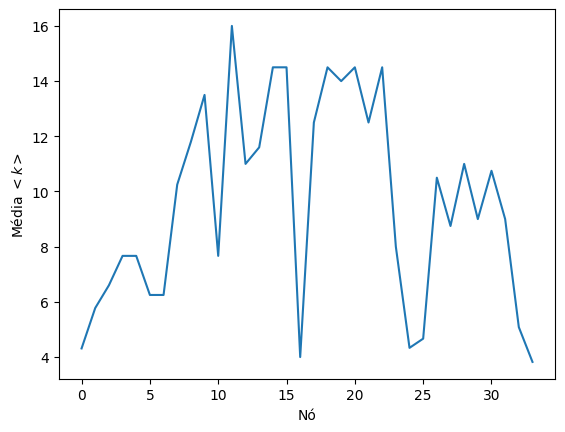

In [ ]:

G = nx.karate_club_graph()

print(f"Correla√ß√£o: {nx.degree_pearson_correlation_coefficient(G)}")

G = nx.watts_strogatz_graph(8,4,0.1)

print(f"Correla√ß√£o: {nx.degree_pearson_correlation_coefficient(G)}")

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5])

for i in range(1, 6):
    for j in range(i+1, 6):
        G.add_edge(i, j)

G = nx.karate_club_graph()

u=np.array(list(nx.average_neighbor_degree(G).items())).T
plt.plot(u[:][0],u[:][1])
plt.ylabel('M√©dia $<k>$')
plt.xlabel('N√≥')
plt.show()


## Graus de bipartividade

Os graus de bipartividade medem a "bipartitividade" de um n√≥ em um grafo bipartido. Em outras palavras, eles medem o qu√£o bem conectado um n√≥ de uma parti√ß√£o est√° com os n√≥s da outra parti√ß√£o.

O c√°lculo dos graus de bipartividade pode ser √∫til para entender como os n√≥s de diferentes parti√ß√µes est√£o conectados em um grafo bipartido e para identificar quais n√≥s podem ser importantes para manter a conectividade entre as duas parti√ß√µes.

### Novo Grafo, Bipartido

In [ ]:
#gerando grafo bipartido
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
G.add_edges_from([('A', 1), ('A', 2), ('B', 2), ('C', 2), ('C', 3), ('D', 3), ('D', 4), ('E', 4)])
canvas = jupyter_canvas()

canvas.nodes(G.nodes).add(color="orange")
canvas.edges(G.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"A": {"color": "orange"}, "B": {"color": "orange"}, "C": {"color":‚Ä¶

## Centralidade de Subgrafo
Uma maneira de quantificar a centralidade de um v√©rtice com base no n√∫mero de subgrafos nos quais o v√©rtice participa.A respectiva medida, chamada centralidade de subgrafo, considera o n√∫mero de subgrafos que constituem um caminho fechado come√ßando e terminando em um determinado v√©rtice i, atribuindo pesos mais altos a subgrafos menores.

\begin{equation}
    SC=\sum_{j=1}^{N}e^{\lambda_{j}}
\end{equation}

 Sendo $\lambda_i$ os autovalores da matriz de adjac√™ncia. Essa medida est√° relacionada aos momentos da matriz de adjac√™ncia, que refletem as propriedades de conectividade do v√©rtice na rede.

## Defini√ß√£o de grau de bipartividade

Abordagem utiliza a centralidade do subgrafo para calcular o grau de biparti√ß√£o de uma rede. A centralidade do subgrafo √© dividida entre caminhos fechados pares e √≠mpares, sendo que apenas os caminhos fechados pares s√£o relevantes em redes bipartidas. Portanto, a fra√ß√£o da centralidade do subgrafo devido aos caminhos fechados pares pode ser usada como uma medida do grau de biparti√ß√£o da rede.

\begin{equation}
    \beta=\frac{SC_{par}}{SC}=\frac{\sum_{j=1}^{N}cosh \lambda_{j}}{\sum_{j=1}^{N}e^{\lambda_{j}}}
\end{equation}

Onde SC √© a centralidade do subgrafo da rede, $SC_{even}$ √© a centralidade do subgrafo devido aos caminhos fechados pares e os $\lambda_j$ s√£o os autovalores da matriz de adjac√™ncia da rede.

In [ ]:
# Criando um grafo bipartido
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
G.add_edges_from([('A', 1), ('A', 2), ('B', 2), ('C', 2), ('C', 3), ('D', 3), ('D', 4), ('E', 4)])

bipartivity = nx.algorithms.bipartite.spectral_bipartivity(G)

print("Grau de bipartividade grafo bipartido")



print(f"{bipartivity}")

G = nx.karate_club_graph()

bipartivity = nx.algorithms.bipartite.spectral_bipartivity(G)

print("Grau de bipartividade Karater club")

print(f"{bipartivity}")


Grau de bipartividade grafo bipartido
1.0
Grau de bipartividade Karater club
0.5974141494528541


 ## informa√ß√µes de pesquisa, entropia de estrada e entropia de saida
 A estrutura de uma rede complexa afeta sua confiabilidade e velocidade de propaga√ß√£o de informa√ß√µes. A entropia de informa√ß√£o √© usada para quantificar a dificuldade de buscar informa√ß√µes na rede. Relacionam a informa√ß√£o de busca com a localiza√ß√£o de um alvo espec√≠fico na rede. A informa√ß√£o m√©dia de busca caracteriza a facilidade ou dificuldade de navega√ß√£o na rede, enquanto a informa√ß√£o de acesso mede a dificuldade de localizar v√©rtices a partir de um v√©rtice inicial.

 Seja p(i, b) um caminho mais curto que come√ßa no v√©rtice i e termina no v√©rtice b. A probabilidade de seguir esse caminho em um passeio aleat√≥rio √©

\begin{equation}
    P[p(i,b)]=\frac{1}{k_i}\prod_{j \in p(i,b)} \frac{1}{k_{j}-1}
\end{equation}

Onde $k_j$ √© o grau do v√©rtice j e o produto inclui todos os v√©rtices j no caminho p(i, b) excluindo i e b.

A informa√ß√£o de busca, correspondente √† informa√ß√£o total necess√°ria para identificar um dos caminhos mais curtos entre i e b, √© dada por

\begin{equation}
    S(i,b)=-log_{2}\sum_{p(i,b)}P[p(i,b)]
\end{equation}
onde a soma √© feita sobre todos os caminhos mais curtos p(i, b) de i para b.

A informa√ß√£o m√©dia de busca caracteriza a facilidade ou dificuldade de navega√ß√£o em uma rede dada por

\begin{equation}
    S=\frac{1}{N^2}\sum_{ib}S(i,b)
\end{equation}

 Informa√ß√£o de acesso:
\begin{equation}
    A_{i}=\frac{1}{N}\sum_{b}S(i,b)
\end{equation}

 Informa√ß√£o escondida:
 \begin{equation}
     A_{b}=\frac{1}{N}\sum_{i}S(i,b)
 \end{equation}



In [ ]:
def shortest_path_probability(G, i, b):
    paths = list(nx.all_shortest_paths(G, source=i, target=b))
    neighbors = list(G.neighbors(i))
    ki = len(neighbors)
    soma_prob=0
    for path in paths:
      probability = 1.0 / ki
      for j in path:
          neighbors = list(G.neighbors(j))
          k = len(neighbors)
          if j != b:
            probability *= 1.0 / (k - 1)
      soma_prob+=probability
    return soma_prob


In [ ]:
def entropy_A(G,i):
  S=0
  u=G.nodes()
  for j in u:
      S+=entropy(G,i,j)
  return  S/len(u)

In [ ]:
def entropy_H(G,i):
  S=0
  u=G.nodes()
  for j in u:
      S+=entropy(G,j,i)
  return  S/len(u)

In [ ]:
def entropy(G, i, b):
    return -math.log2(shortest_path_probability(G,i,b))


In [ ]:
def entropy_total(G):
  S=0
  u=G.nodes()
  for i in u:
    for j in u:
      S+=entropy(G,i,j)
  return S/len(u)**2


entropia total do sistema 3.4629397780267115



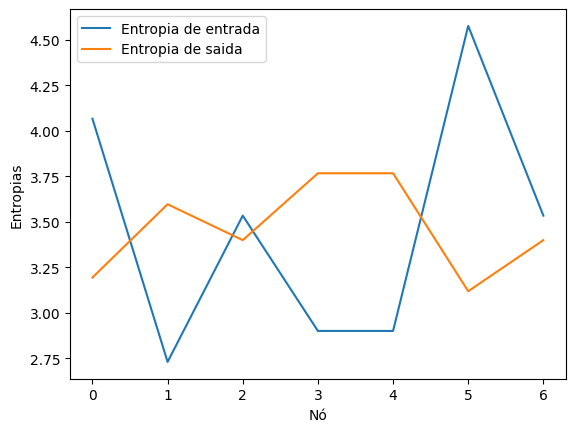

In [ ]:
G = nx.watts_strogatz_graph(7,4,0.4)
#G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
matriz_entropy=np.empty((len(G.nodes()),len(G.nodes())))
print(f'entropia total do sistema {entropy_total(G)}\n')
E_A=[]
E_H=[]
#calculando a entropia da entrada e saida
for u in G.nodes():
  E_A.append(entropy_A(G,u))
  E_H.append(entropy_H(G,u))
u=G.nodes()
#plot do grafico
plt.plot(u,E_A,label='Entropia de entrada')
plt.plot(u,E_H,label='Entropia de saida')
plt.legend()
plt.ylabel('Entropias')
plt.xlabel('N√≥')
plt.show()

## Espectro da matriz de adjac√™ncia

O espectro de uma rede corresponde ao conjunto de autovalores i de sua matriz de adjac√™ncia A. Temos a densidade de para rede ser√° definido
\begin{equation}
    p(\lambda)=\frac{1}{N}\sum_{i}\delta(\lambda-\lambda_{i})
\end{equation}

Os autovalores e autovetores associados de uma rede est√£o relacionados ao di√¢metro, ao n√∫mero de ciclos e √†s propriedades de conectividade da rede.

Autovalores da matriz de adjac√™ncia:
1¬∞ momento 6.439293542825908e-16
2¬∞ momento 5.700000000000011
3¬∞ momento 6.300000000000062
4¬∞ momento 102.70000000000053


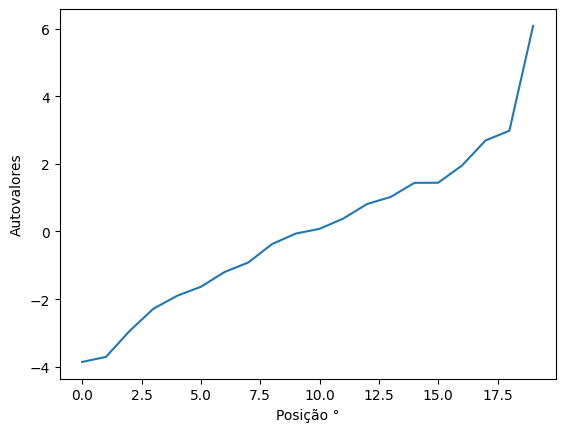

In [ ]:
G = nx.erdos_renyi_graph(20, 0.3)

adj_matrix = nx.to_numpy_array(G)

# Calculando os autovalores da matriz de adjac√™ncia
eigenvalues = np.linalg.eigvals(adj_matrix)

print("Autovalores da matriz de adjac√™ncia:")
plt.plot(range(len(eigenvalues)),sorted(eigenvalues))
plt.ylabel('Autovalores')
plt.xlabel('Posi√ß√£o ¬∞')

print(f'1¬∞ momento {np.sum(eigenvalues)/len(eigenvalues)}')
print(f'2¬∞ momento {np.sum(eigenvalues**2)/len(eigenvalues)}')
print(f'3¬∞ momento {np.sum(eigenvalues**3)/len(eigenvalues)}')
print(f'4¬∞ momento {np.sum(eigenvalues**4)/len(eigenvalues)}')
plt.show()



## Centralidade de intermedia√ß√£o

O m√©todo divisivo mais popular √© o algoritmo de GirvanNewman. Como diferentes comunidades est√£o conectadas por um pequeno n√∫mero de arestas, este m√©todo considera que os gargalos s√£o formados nas arestas que conectam comunidades, por onde devem passar todos os caminhos mais curtos. Em ordem para medir essa propriedade relacionada ao tr√°fego nas redes, o algoritmo usa o conceito de limite intermedi√°rio.

In [ ]:
G = nx.karate_club_graph()

# Executa o algoritmo de Girvan-Newman
comp = girvan_newman(G)

communities = tuple(sorted(c) for c in next(comp))
print("Comunidades encontradas:")
print(communities)

#grafo bipartido
G = nx.Graph()
G.add_nodes_from([5, 6, 7, 8, 9], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
G.add_edges_from([(5, 1), (5, 2), (6, 2), (7, 2), (7, 3), (8, 3), (8, 4), (9, 4)])

comp = girvan_newman(G)

communities = tuple(sorted(c) for c in next(comp))

print("Comunidades encontradas:")
print(communities)

Comunidades encontradas:
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
Comunidades encontradas:
([1, 2, 5, 6], [3, 4, 7, 8, 9])


## Maximiza√ß√£o da modularidade

Newman prop√¥s um m√©todo base em juntar as comunidades de tal forma que  modularidade(medida da estrutura de redes ou grafos que mede a for√ßa da divis√£o de uma rede em m√≥dulos) chegasse no m√°ximo.

Temos que $e_{ij}$, uma matriz misturada de tamanho c x c onde √© as quantidades de comunidades.

\begin{equation}
    \Delta Q_{ij} = 2 \left(e_{ij}-\frac{\sum_{j}e_{ij}\sum_{i}e_{ij}}{2M}\right)
\end{equation}

O metodo tenta procurar conectar as comunidades de tal forma que modularidade seja o m√°ximo considerando todas as comunidade desconectada, temos que modularidade calcula normalizadamente.

\begin{equation}
    \frac{\Delta Q_{ij}}{\sum_{j}e_{ij}} = \frac{2}{\sum_{j}e_{ij}} (e_{ij}-\frac{\sum_{j}e_{ij}\sum_{i}e_{ij}}{2M})
\end{equation}







In [ ]:

G = nx.karate_club_graph()
c = nx.community.greedy_modularity_communities(G)
for i in sorted(c):
  print(i)
G = nx.Graph()

frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
frozenset({0, 16, 19, 4, 5, 6, 10, 11})


## Metodo de sele√ß√£o

Apesar dos muitos m√©todos alternativos interessantes, incluindo aqueles brevemente revisados acima, deve-se notar que o problema de encontrar comunidades continua sendo um desafio porque nenhum m√©todo √∫nico √© r√°pido e sens√≠vel o suficiente para garantir resultados ideais para grandes redes gerais, um problema que √© agravado pela falta de uma defini√ß√£o clara de comunidades. Se as comunidades devem ser identificadas com alta precis√£o, o m√©todo espectral proposto por Newman √© uma boa escolha. No entanto, se a prioridade for atribu√≠da √† velocidade, m√©todos como os que usam algoritmos gulosos devem ser considerados. Em resumo, a escolha do melhor m√©todo a ser utilizado depende da configura√ß√£o do problema e do tipo de resultado desejado. Um fato que deve ter ficado claro em nossa breve revis√£o das abordagens de localiza√ß√£o de comunidades √© a import√¢ncia essencial da escolha das medidas adotadas para expressar a separa√ß√£o das comunidades. Na verdade, tais medi√ß√µes representam, em √∫ltima an√°lise, uma defini√ß√£o objetiva de comunidades. Portanto, uma perspectiva interessante para novas pesquisas seria considerar a poss√≠vel adapta√ß√£o e combina√ß√£o de algumas das medi√ß√µes relatadas neste levantamento com o objetivo espec√≠fico de caracteriza√ß√£o da comunidade.

## Subgrafos e motivos em redes ponderadas

Em redes ponderadas, um subgrafo pode estar presente com valores diferentes para os pesos das arestas. Sugeriram uma defini√ß√£o para a intensidade de um subgrafo baseada na m√©dia geom√©trica de seus pesos na rede.
\begin{equation}
    I(g)=\left(\prod_{(i,j)\in \xi(g)}w_{ij}\right)^{1/n_{g}}
\end{equation}

onde $n_{g}=|\varepsilon(g)|$

Para caso os pesos sejam 1 ou pequeno demais, usamos coer√™ncia.

\begin{equation}
    \psi(g)=\frac{I_{g}n_{g}}{\sum_{(i,j)\in \xi(g)}w_{ij}}
\end{equation}


Onde usamos raz√£o entre m√©dia geom√©trica e a aritm√©tica.

In [ ]:

def I_g(G):
  w=nx.to_numpy_array(G)
  I=1
  for i in range(len(w[0])):
    for j in range(len(w)):
      if w[i][j]>0.0:
        I*=w[i][j]
  return I**(1/G.number_of_edges())

In [ ]:
def psi(G,I):
  a=nx.to_numpy_array(G)
  return  I*Aux.number_of_edges()/np.sum(a)

In [ ]:
G = nx.karate_club_graph()

Aux=G.subgraph([8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

I=I_g(Aux)

ps=psi(Aux,I)

print('Intensidade',I)

print('Coerencia',ps)



Aux=G.subgraph([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21])

I=I_g(Aux)

ps=psi(Aux,I)

print('Intensidade',I)

print('Coerencia',ps)

canvas = jupyter_canvas()

canvas.nodes(Aux.nodes).add(color="orange")
canvas.edges(Aux.edges).add()

canvas

Intensidade 1.0
Coerencia 0.5
Intensidade 1.0
Coerencia 0.5


JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "3": {"color":‚Ä¶

## Coeficiente m√©dio de agrupamento e coeficiente m√©dio de agrupamento hier√°rquico de segundo n√≠vel.

O coeficiente de agrupamento mede a probabilidade de que os vizinhos dos vizinhos de um v√©rtice em um grafo estejam conectados entre si.


 O coeficiente de agrupamento hier√°rquico de segundo n√≠vel √© a m√©dia dessas m√©dias para todos os v√©rtices do grafo. Esse coeficiente √© uma medida de como as conex√µes entre os vizinhos de um v√©rtice se propagam para al√©m do primeiro n√≠vel de vizinhos.

In [ ]:
def clustering_coefficient_2d(G):

    G1 = nx.Graph()
    for i in G.nodes():
        for j in G.neighbors(i):
            for k in G.neighbors(i):
                if j != k and j < k and k in G.neighbors(j):
                    G1.add_edge(j, k)
    N = len(G1.nodes())
    num = 0
    den = 0
    for i in G1.nodes():
        for j in G1.neighbors(i):
            for k in G1.neighbors(i):
                if j != k and j < k:
                    if G.has_edge(i, j) and G.has_edge(i, k) and G.has_edge(j, k):
                        num += 1
                    if G.has_edge(i, j) and G.has_edge(i, k):
                        den += 1

    if den == 0:
        return 0
    else:
        return (1/N) * (num / den)


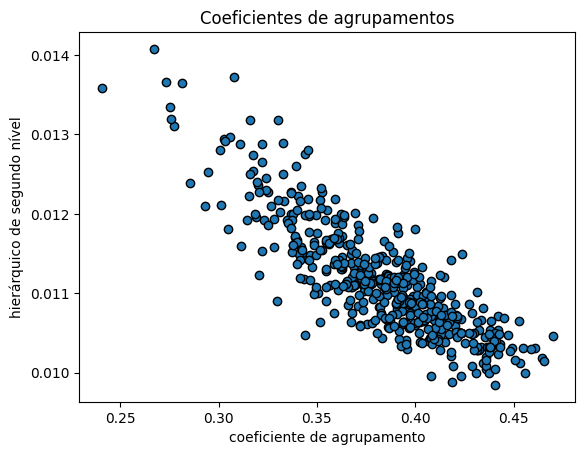

In [ ]:
avg_clu=[]
clu_2d=[]
for i in range(500):
  G = nx.watts_strogatz_graph(50,5,0.1)

  clustering_coefficients = nx.clustering(G)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)

  avg_clu.append(avg_clustering_coefficient)
  clu_2d.append(clustering_coefficient_2d(G))
#plot da rela√ß√£o entres os dois coeficientes
plt.scatter(avg_clu,clu_2d,edgecolor='black')
plt.title('Coeficientes de agrupamentos')
plt.xlabel('coeficiente de agrupamento')
plt.ylabel('hier√°rquico de segundo n√≠vel')
plt.show()

## An√°lise de Vari√°veis Can√¥nicas

√â uma t√©cnica de an√°lise de regress√£o que envolve a cria√ß√£o de novas vari√°veis, conhecidas como vari√°veis can√¥nicas, sendo combina√ß√µes lineares das vari√°veis originais. A ideia √© criar novas vari√°veis que capturem a maior quantidade poss√≠vel de varia√ß√£o nas vari√°veis originais e que estejam altamente correlacionadas entre si.

Para fazer essas transforma√ß√µes, devemos definir a **matriz de dispers√£o**.
\begin{equation}
    S_{i}=\sum_{\xi \in C_{i}}(\vec{X_{\xi}}-<\vec{X}>_{i})(\vec{X_{\xi}}-<\vec{X}>_{i})^{T}
\end{equation}

Assim podemos definir duas, primeira a matriz **matriz de dispers√£o de interclasse**

\begin{equation}
    S_{intra}=\sum_{i=1}^{N_{c}} S_{i}
\end{equation}


e a matriz de disper√ß√£o interclaase

\begin{equation}
    S_{inter}=\sum_{i=1}N_{i}(<\vec{X}>_{i}-<\vec{X}>)(<\vec{X}>_{i}-<\vec{X}>)^{T}
\end{equation}

Para encontrar os autovetores que ir√£o fazer transma√ß√£o do CVA, encontrando os autovetores da matriz $S_{intra}^{-1}S_{inter}$.


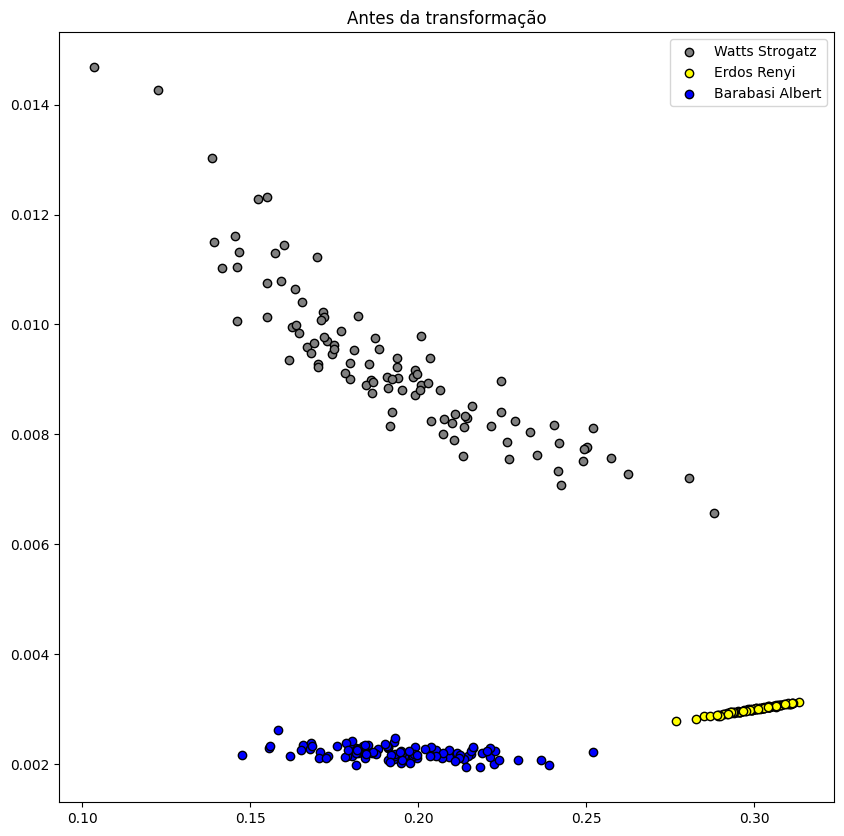

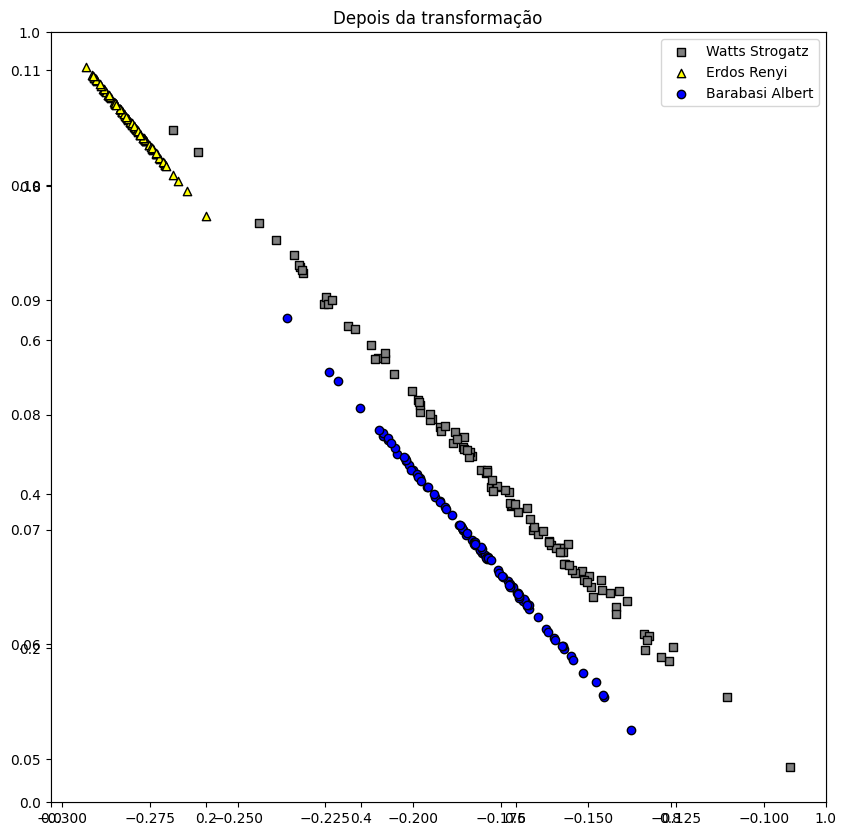

In [ ]:
import numpy as np
from matplotlib import style
n=100

x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
classes=[]

for i in range(n):
  # grafos
  Sw=nx.watts_strogatz_graph(100,5,0.3)
  Er=nx.erdos_renyi_graph(100,0.3)
  Ba=nx.barabasi_albert_graph(100,5)
  # grafos Watts Strogatz
  clustering_coefficients = nx.clustering(Sw)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
  x1.append(avg_clustering_coefficient)
  y1.append(clustering_coefficient_2d(Sw))
  classes.append(0)
  # grafos Er
  clustering_coefficients = nx.clustering(Er)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
  x2.append(avg_clustering_coefficient)
  y2.append(clustering_coefficient_2d(Er))
  classes.append(1)
  # grafos Ba
  clustering_coefficients = nx.clustering(Ba)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
  x3.append(avg_clustering_coefficient)
  y3.append(clustering_coefficient_2d(Ba))
  classes.append(2)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
plt.title("Antes da transforma√ß√£o")
ax0.scatter(x1,y1,label='Watts Strogatz',c='grey',edgecolor='black')
ax0.scatter(x2,y2,label='Erdos Renyi',c='yellow',edgecolor='black')
ax0.scatter(x3,y3,label='Barabasi Albert',c='blue',edgecolor='black')
ax0.legend()
plt.show()

# Calculate the mean vectors per class
z1=[x1,y1]
z2=[x2,y2]
z3=[x3,y3]

d=2
mena=np.array([x1+x2+x3,y1+y2+y3])
mean_overall = np.mean(mena, axis=1)
S_B = np.zeros((d, d))

mean_rectangles = np.mean(z1,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions
mean_triangles = np.mean(z2,axis=1).reshape(2,1)
mean_circles = np.mean(z3,axis=1).reshape(2,1)

mean_vec=[mean_rectangles,mean_triangles,mean_circles ]

for i, mean_vec in enumerate(mean_vec):
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)



mean_rectangles = np.mean(z1,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions
mean_triangles = np.mean(z2,axis=1).reshape(2,1)
mean_circles = np.mean(z3,axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_rectangles = np.dot((z1-mean_rectangles),(z1-mean_rectangles).T)
scatter_triangles = np.dot((z2-mean_triangles),(z2-mean_triangles).T)
scatter_circles = np.dot((z3-mean_circles),(z3-mean_circles).T)

# Calculate the SW by adding the scatters within classes
SW = scatter_triangles+scatter_circles+scatter_rectangles

eigen_vals, eigen_vecs = np.linalg.eigh(np.linalg.inv(SW).dot(S_B))

z1_trans = np.dot(eigen_vecs,np.array(z1))
z2_trans = np.dot(eigen_vecs,np.array(z2))
z3_trans = np.dot(eigen_vecs,np.array(z3))


fig = plt.figure(figsize=(10,10))
plt.title("Depois da transforma√ß√£o")
ax0 = fig.add_subplot(111)
ax0.scatter(z1_trans[0],z1_trans[1],marker='s',label='Watts Strogatz',c='grey',edgecolor='black')
ax0.scatter(z2_trans[0],z2_trans[1],marker='^',label='Erdos Renyi',c='yellow',edgecolor='black')
ax0.scatter(z3_trans[0],z3_trans[1],marker='o',label='Barabasi Albert',c='blue',edgecolor='black')
ax0.legend()
plt.show()




## Grau hier√°rquico m√©dio de segundo n√≠vel

Tamb√©m conhecido como HD2, √© uma medida de centralidade em redes que tenta capturar a import√¢ncia dos n√≥s em diferentes n√≠veis hier√°rquicos na rede

In [ ]:
def HDR2(G):
  hd2 = {}
  for node in G.nodes():
      hd2[node] = sum([G.degree(neighbor) for neighbor in G.neighbors(node)]) - 2 * G.degree(node)
  mean=0
  for node, value in hd2.items():
      mean+=value
  return mean/len(hd2.items())

## Raz√£o de diverg√™ncia hier√°rquica m√©dia do terceiro n√≠vel

Medida de centralidade em grafos que considera a diversidade dos caminhos mais curtos que passam por um n√≥.





In [ ]:
def HDR3(G):
  root = max(dict(G.degree()).items(), key=lambda x: x[1])[0]
  shortest_paths = nx.single_source_shortest_path(G, root)
  predecessors = {}
  for node in G.nodes():
      pred = []
      for path in shortest_paths.values():
          if node in path and path.index(node) > 0:
              pred.append(path[path.index(node)-1])
      predecessors[node] = pred
  hdr3 = {}
  for node in G.nodes():
      hdr = 1
      for pred in predecessors[node]:
          hdr *= nx.degree(G, pred)
      hdr3[node] = hdr
  mean = 0
  for node, hdr in hdr3.items():
      mean+=hdr
  return mean/len(hdr3.items())



## An√°lise do componente principal

O objetivo √© encontrar um conjunto menor de vari√°veis, chamados componentes principais, que resumem as informa√ß√µes contidas no conjunto original de vari√°veis.

Para calcular temos
\begin{equation}
    K=\frac{(\vec{x}-<\vec{x}>)(\vec{x}-<\vec{x}>)^T}{R}
\end{equation}

O K ser√° um matriz sim√©trica e real, portanto, ser√° do tamanho P √© tamanho das m√©tricas, assim teremos P autovalores distitos $\lambda_I$, portanto temos que os ser√£o distintos autovetores. Podemos construir a seguinte matriz de transforma√ß√£o

\begin{equation}
    T=(1,1,1,..,1,1)^T\otimes[v_{1},v_{2},v_{3},...,v_{p-1},v_{p}]
\end{equation}

Onde podemos definir a **Proje√ß√£o das componentes principais**





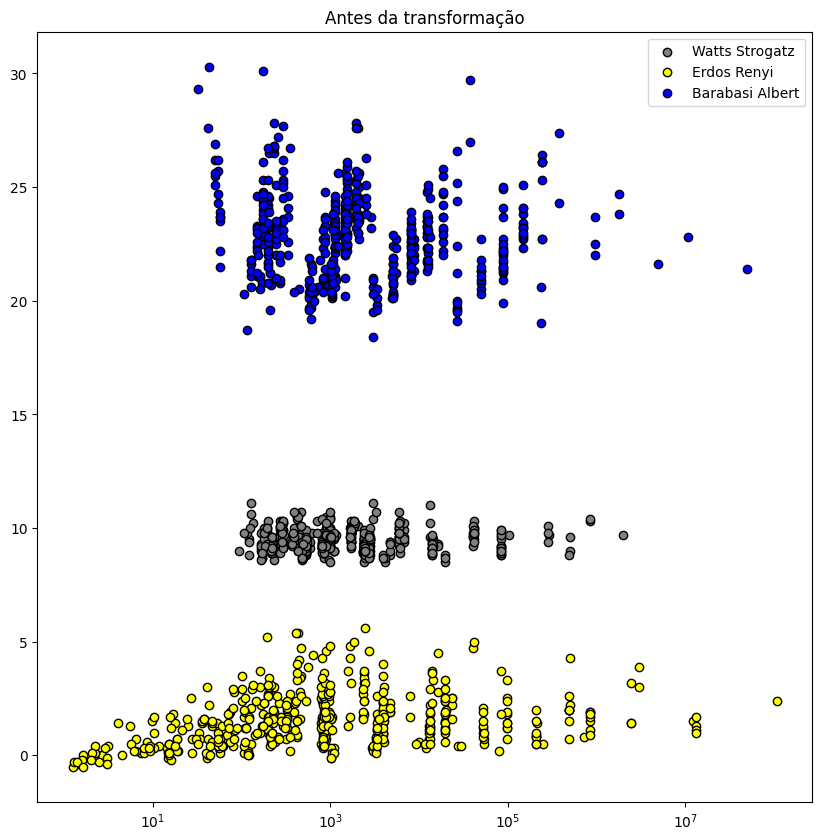

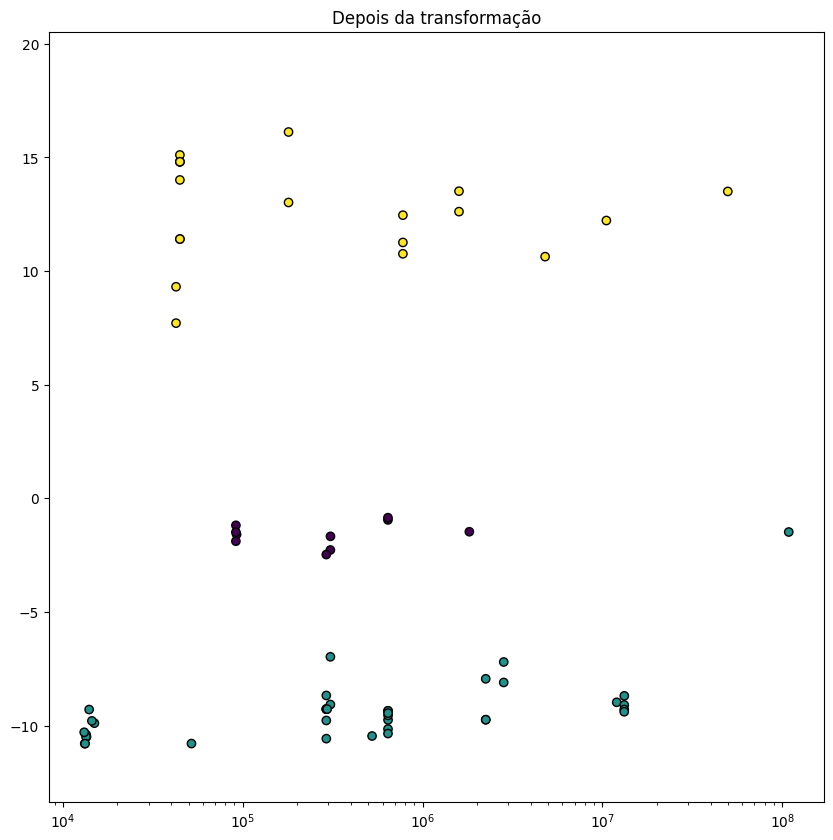

In [ ]:
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
classes=[]

for i in range(500):
  G = nx.watts_strogatz_graph(20,5,0.5)
  Er=nx.erdos_renyi_graph(20,0.1)
  Ba=nx.barabasi_albert_graph(20,3)
  classes.append(0)
  x1.append(HDR3(G))
  y1.append(HDR2(G))
  classes.append(1)
  x2.append(HDR3(Er))
  y2.append(HDR2(Er))
  classes.append(2)
  x3.append(HDR3(Ba))
  y3.append(HDR2(Ba))

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
plt.title("Antes da transforma√ß√£o")
ax0.scatter(x1,y1,label='Watts Strogatz',c='grey',edgecolor='black')
ax0.scatter(x2,y2,label='Erdos Renyi',c='yellow',edgecolor='black')
ax0.scatter(x3,y3,label='Barabasi Albert',c='blue',edgecolor='black')
plt.xscale('log')
ax0.legend()
plt.show()

data=list(zip(x1+x2+x3,y1+y2+y3))
pca = PCA(n_components=2)
components = pca.fit_transform(data)
classes2=[0]*len(x1)+[1]*len(x2)+[2]*len(x3)
# Plota os componentes principais
fig = plt.figure(figsize=(10,10))
plt.title("Depois da transforma√ß√£o")
plt.scatter(components[:,0], components[:,1],c=classes2,edgecolor='black')
plt.xscale('log')
plt.show()


## Reciprocidade de borda

Essas informa√ß√µes ajudam a obter uma melhor caracteriza√ß√£o da rede, podem ser usadas para testar modelos de rede em rela√ß√£o a redes reais e d√£o indica√ß√£o de quanta informa√ß√£o √© perdida quando a dire√ß√£o das arestas √© descartada (por exemplo, para o c√°lculo de algumas medi√ß√µes que s√≥ se aplicam para redes n√£o direcionadas).

$ùò±=\frac{\sum_{ij}a_{ij}a_{ji}}{M}$

Temos que **Reciprocidade de borda**, onde $<a>$ √© media da matriz adjac√™ncia

$…ñ=\frac{p-<a>}{1-<a>}$

Onde $…ñ$ √© maior que zero implica em reciprocidade.

In [ ]:
def edges_rec(G):
  num_reciprocal_edges = 0
  num_edges = G.number_of_edges()
  for u, v in G.edges():
      if G.has_edge(v, u):
          num_reciprocal_edges += 1

  return num_reciprocal_edges / num_edges

In [ ]:
def edges_coef(G):
  matrix=nx.to_numpy_array(G)
  a=matrix.mean()
  return (edges_rec(G)-a)/(1-a)

In [ ]:

G = nx.DiGraph()
G.add_edges_from([(1,2), (2,3), (3,1), (1,4), (4,1)])

print("Grafo aleat√≥rio Reciprocidade de borda: {:.2f}".format(edges_coef(G)))

G = nx.watts_strogatz_graph(20,4,0.1)

print("Watts Strogatz Reciprocidade de borda: {:.2f}".format(edges_coef(G)))

Grafo aleat√≥rio Reciprocidade de borda: 0.13
Watts Strogatz Reciprocidade de borda: 1.00


## A an√°lise de correla√ß√£o

Embora um n√∫mero virtualmente infinito de medi√ß√µes possa ser obtido para quantificar a conectividade de redes complexas, um grau vari√°vel de redund√¢ncia ser√° observado entre suas combina√ß√µes de pares. Por exemplo, o grau do n√≥ e o coeficiente de agrupamento n√£o s√£o correlacionados para a maioria das redes. Al√©m disso, a intensidade de tais correla√ß√µes pode depender do tipo espec√≠fico de rede complexa. No presente trabalho quantificamos o grau de correla√ß√£o entre duas medidas x e y em um conjunto de n redes, entendidas como duas vari√°veis aleat√≥rias, em termos do coeficiente de correla√ß√£o de Pearson.

In [ ]:
G = nx.karate_club_graph()
#duas m√©tricas diferentes
deg_centrality = nx.degree_centrality(G)
btw_centrality = nx.betweenness_centrality(G)

deg_centrality_vec = np.array(list(deg_centrality.values()))
btw_centrality_vec = np.array(list(btw_centrality.values()))
#Correla√ß√£o
corr_coef = np.corrcoef(deg_centrality_vec, btw_centrality_vec)[0,1]
print("Coeficiente de correla√ß√£o: {:.2f}".format(corr_coef))


Coeficiente de correla√ß√£o: 0.91


## Bayesiano

 A metodologia elegante e s√≥lida conhecida como teoria da decis√£o bayesiana fornece um meio intuitivo e eficaz para classificar objetos em um determinado conjunto de categorias. Em princ√≠pio, assume-se que as probabilidades de massa $P_i$, bem como as condicionais densidades de probabilidade, $p(\vec{x}_{œµ}|C_{i})$ ou podem ser estimados adequadamente. A probabilidade em massa $P_i$ corresponde √† probabilidade de um objeto, independentemente de suas propriedades, pertencer √† classe $C_i$ e, portanto, pode ser estimado a partir da respectiva frequ√™ncia relativa. A probabilidades condicionais $p(\vec{x}_{œµ}|C_{i})$ fornecem um modelo estat√≠stico de como as medidas nos vetores de caracter√≠sticas s√£o distribu√≠das dentro de cada categoria.

Caso as fun√ß√µes de probabilidade n√£o estejam dispon√≠veis, ainda √© poss√≠vel usar m√©todos de classifica√ß√£o aproximados como k-vizinhos mais pr√≥ximos, que consiste em identificar o conjunto dos k indiv√≠duos que est√£o mais pr√≥ximos √† amostra a ser classificada, e toma como categoria resultante aquela que corresponde √† classe mais frequente entre os vizinhos mais pr√≥ximos.

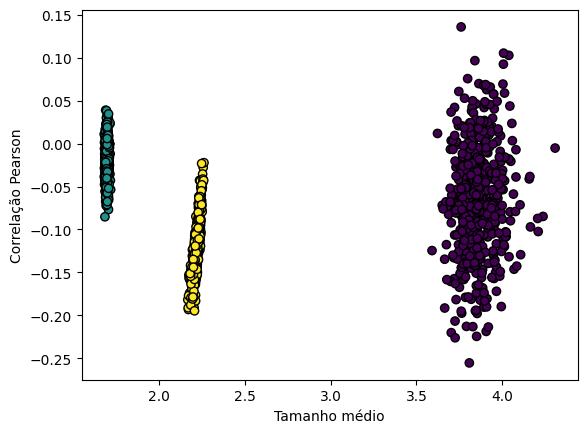

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#criando a lista
x=[]
y=[]
classes=[]
for i in range(500):
  Sw=nx.watts_strogatz_graph(100,5,0.3)
  Er=nx.erdos_renyi_graph(100,0.3)
  Ba=nx.barabasi_albert_graph(100,5)
  # grafos Sw
  x.append(nx.average_shortest_path_length(Sw))
  y.append(nx.degree_pearson_correlation_coefficient(Sw))
  classes.append(0)
  # grafos Er
  x.append(nx.average_shortest_path_length(Er))
  y.append(nx.degree_pearson_correlation_coefficient(Er))
  classes.append(1)
  # grafos Ba
  x.append(nx.average_shortest_path_length(Ba))
  y.append(nx.degree_pearson_correlation_coefficient(Ba))
  classes.append(2)

knn = KNeighborsClassifier(n_neighbors=10)
data = list(zip(x,y))
knn.fit(data,classes)
plt.xlabel("Tamanho m√©dio")
plt.ylabel("Correla√ß√£o Pearson")
plt.scatter(x,y,c=classes,edgecolor='black')
plt.show()

# Caminhada Deterministica

## Entropia de Shannon
A entropia de Shannon (ES) √© usada como uma medida para a assimetria entre zeros e uns na s√©rie temporal de cada n√≥ e, quando calculada em m√©dia para todos os n√≥s, dos padr√µes "esp√°cio temporais". Para obter a entropia de Shannon do padr√£o, calculamos a entropia de Shannon para cada n√≥ e depois fazemos a m√©dia para todos os N n√≥s:
\begin{equation}
    E_{s}=\frac{-1}{N}\sum_{i=0}^{N}p_{i}^{0}\log(p_{i}^{0})+p_{i}^{1}\log(p_{i}^{1})
\end{equation}
onde $p_{i}^{0}$ e $p_{i}^{1}$ s√£o estimadas a partir das propor√ß√µes de 0 e 1 na s√©rie temporal do n√≥ i.

## Entropia de palavras

A entropia de palavras quantifica a irregularidade de uma s√©rie temporal em uma escala maior (tempo), contando o n√∫mero de palavras constantes (ou seja, blocos de estados constantes delimitados pelo respectivo outro estado bin√°rio):

\begin{equation}
    E_{w}=\frac{-1}{N}\sum_{i=0}^{N}\sum_{l=0}^{\infty}p_{i}^{l}\log(p_{i}^{l})
\end{equation}

A probabilidade $p_{i}^{l}$ √© calculada dividindo o n√∫mero de palavras constantes de comprimento l pelo n√∫mero total de palavras encontradas na s√©rie temporal do n√≥ i.

In [ ]:
def shannon(G):
  soma=0
  le=len(list(G.nodes()))
  for node in G.nodes():
      soma+=G.nodes[node]['state']
  prob=soma/le
  if prob>0 and 1>prob:
    return (-1)*(prob*np.log(prob)+(1-prob)*np.log(1-prob))
  return 0

In [ ]:
def Ew(G):
  lst=[G.nodes[i]['state'] for i in G.nodes()]
  sequence_lengths=count_sequence_lengths(lst)
  l=len(sequence_lengths)
  entropy=0.0
  for i in range(max(sequence_lengths)+1):#fazendo todas as probabilidades
    soma=0
    for j in sequence_lengths:#
      if i==j:
        soma+=1
    prob=soma/l
    if prob>0:#probabilidade
      entropy+= prob*np.log(prob)
  return -entropy

def count_sequence_lengths(lst):
    sequence_lengths = []#criando variaveis iniciais
    current_length = 0
    current_value = None

    for value in lst:#contagem dos tamanhos
        if value != current_value:
            if current_value is not None:#caso a lista n√£o exista
                sequence_lengths.append(current_length)
            current_value = value
            current_length = 1
        else:
            current_length += 1

    if current_value is not None:#inserindo
        sequence_lengths.append(current_length)

    return sequence_lengths



## Spatio-temporal
Os aut√¥matos celulares t√™m sido amplamente utilizados em diversos estudos para investigar como padr√µes complexos surgem a partir de regras din√¢micas simples.

\begin{equation}
x_{i}(t+1)=\left\{\begin{array}{c}
        \alpha \text{,    }  p_i\geq k\\
        \beta \text{,   }   p_i<k \\
    \end{array}\right\}
\end{equation}

temos que $\alpha,\beta \in \{1,0,"+","-"\}$, onde $+=x_{i}(t)$ e $-=x_{i}(t)$.

In [ ]:
law=33#regras
#valores que deram certo
#182
#descartado
#123,174
k=0.5
run=50

In [ ]:
def apply_rule(graph,r,k):
    new_graph = graph.copy()


    for node in graph.nodes():

        soma=0
        len0=len(list(graph.neighbors(node)))
        if len0>0:
          for j in graph.neighbors(node):
            soma+=graph.nodes[j]['state']
          prob=soma/len0
        else:
          prob=0
        if (r[7] == 1 and prob>=k):#regra 128
            new_graph.nodes[node]['state'] = 1
        elif (r[6] == 1 and prob>=k):#regra 64
            new_graph.nodes[node]['state'] = 0
        elif (r[5] == 1 and prob>=k):#regra 32
            new_graph.nodes[node]['state'] = 1-graph.nodes[node]['state']
        elif (r[4] == 1 and prob>=k):#regra 16
            new_graph.nodes[node]['state'] = graph.nodes[node]['state']
        elif (r[3] == 1 and prob<k):#regra 8
            new_graph.nodes[node]['state'] = 1
        elif (r[2] == 1 and prob<k):#regra 4
            new_graph.nodes[node]['state'] = 0
        elif (r[1] == 1 and prob>=k):#regra 2
            new_graph.nodes[node]['state'] = 1-graph.nodes[node]['state']
        elif (r[0] == 1 and prob<k):#regra 1
            new_graph.nodes[node]['state'] = graph.nodes[node]['state']
    return new_graph

def run_simulation(initial_graph, num_steps, number_rule,k):
    rule = format(number_rule, '08b')#colocando no formato dos 8 bits
    list_rule = [int(bit) for bit in rule]
    graphs = [initial_graph]
    for _ in range(num_steps):
        new_graph = apply_rule(graphs[-1],list_rule[-1::-1],k)
        graphs.append(new_graph)
    return graphs




### Entropy word

In [ ]:
import os
Ew_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Bar.append(np.mean(ews))


In [ ]:
import os
Ew_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Er.append(np.mean(ews))

In [ ]:
import os
Ew_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Ge.append(np.mean(ews))

In [ ]:
import os
Ew_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Wa.append(np.mean(ews))

### Shannon entropy

In [ ]:
import os
shannon_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Bar.append(np.mean(ews))


In [ ]:
import os
shannon_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Er.append(np.mean(ews))

In [ ]:
import os
shannon_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Ge.append(np.mean(ews))

In [ ]:
import os
shannon_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation(G, run, law,k)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Wa.append(np.mean(ews))

In [ ]:
l=125
color=[1]*l+[2]*l+[3]*l+[4]*l
classes=['Er']*l+['Bar']*l+['Geo']*l+['Wat']*l
df=pd.DataFrame({"Color":color
                ,"Classes":classes
                ,"Shannon":shannon_Er+shannon_Bar+shannon_Ge+shannon_Wa
                ,"Ew":Ew_Er+Ew_Bar+Ew_Ge+Ew_Wa})

## Conclus√£o
Para a rede Barabasi e geometrica podemos distinguir atrav√©s de um scatter plot usando a regra 33.

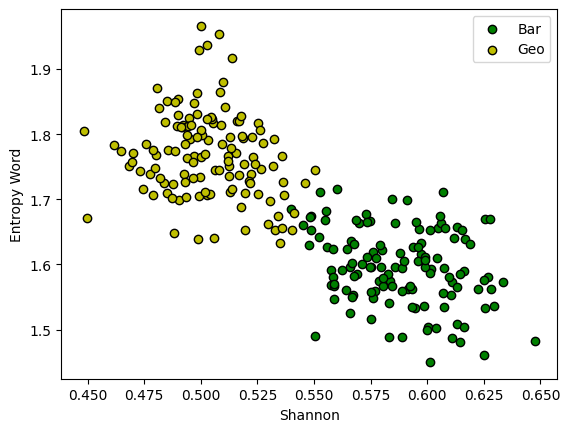

In [ ]:
l=125
#plt.scatter(df["Shannon"][:l],df["Ew"][:l],c='r',label=df["Classes"][0],edgecolor='black')
plt.scatter(df["Shannon"][l:2*l],df["Ew"][l:2*l],c='g',label=df["Classes"][l],edgecolor='black')
plt.scatter(df["Shannon"][2*l:3*l],df["Ew"][2*l:3*l],c='y',label=df["Classes"][2*l],edgecolor='black')
#plt.scatter(df["Shannon"][3*l:4*l],df["Ew"][3*l:4*l],c='k',label=df["Classes"][3*l])
plt.xlabel("Shannon")
plt.ylabel("Entropy Word")
plt.legend()
plt.show()

## LLNA

https://scg.ifsc.usp.br/llna/#

O Aut√¥mato de Rede Vida-Semelhante\cite{miranda2016exploring} (LLNA em ingl√™s) foi criado para reconhecer padr√µes em redes. Ele utiliza a topologia da rede para formar uma malha em um Aut√¥mato Celular (CA), cuja din√¢mica produz um padr√£o espacial e temporal utilizado para extrair atributos e caracter√≠sticas da rede. O CA implementado √© baseado nas regras do Vida-Semelhante.

√â importante observar que, devido √†s diferentes dimens√µes dos vizinhos em compara√ß√£o com reticulados 1D ou 2D regulares, e √† falta de uma ordem espec√≠fica entre os vizinhos, apenas um conjunto limitado de regras cl√°ssicas de aut√¥matos celulares pode ser plausivelmente aplicado a grafos gerais. Portanto, concentramos nossa aten√ß√£o nos aut√¥matos celulares totalitar√≠sticos, nos quais apenas um aut√¥mato celular onde o estado de um n√≥ i √© determinado pela densidade dos estados em seus vizinhos. Implementamos uma din√¢mica de limiar em que um n√≥ altera seu estado se a densidade de estados em seu entorno ultrapassar um determinado limiar. Caso contr√°rio, o n√≥ mant√©m seu estado atual.

\begin{equation}
x_{i}(t+1)=\left\{
    \begin{array}{c}
        1, \frac{x}{9}\leq p_i<\frac{x+1}{9},\text{se } x\neq8 \\
        1, \frac{x}{9}\leq p_i\leq\frac{x+1}{9},\text{se } x=8      \\
        0,\text{Outros casos}
    \end{array}\right\}
\end{equation}


In [ ]:
def apply_rule_LLNA(graph,b,s):
    new_graph = graph.copy()

    for node in graph.nodes():
        soma=0
        len0=len(list(graph.neighbors(node)))
        if len0>0:
          for j in graph.neighbors(node):
            soma+=graph.nodes[j]['state']#somando todos
          prob=soma/len0#fazendo a probabilidade
        else:
          prob=0
        if ((b[8] == 1 and graph.nodes[node]['state']==1) or (s[8] == 1 and graph.nodes[node]['state']==0) and prob>=8/9):
            new_graph.nodes[node]['state'] = 1#regra B8 ou S8
        elif ((b[7] == 1 and graph.nodes[node]['state']==1) or (s[7] == 1 and graph.nodes[node]['state']==0) and prob>=7/9):
            new_graph.nodes[node]['state'] = 1#regra B7 ou S7
        elif ((b[6] == 1 and graph.nodes[node]['state']==1) or (s[6] == 1 and graph.nodes[node]['state']==0) and prob>=6/9):
            new_graph.nodes[node]['state'] = 1#regra B6 ou S6
        elif ((b[5] == 1 and graph.nodes[node]['state']==1) or (s[5] == 1 and graph.nodes[node]['state']==0) and prob>=5/9):
            new_graph.nodes[node]['state'] = 1#regra B5 ou S5
        elif ((b[4] == 1 and graph.nodes[node]['state']==1) or (s[4] == 1 and graph.nodes[node]['state']==0) and prob>=4/9):
            new_graph.nodes[node]['state'] = 1#regra B4 ou S4
        elif ((b[3] == 1 and graph.nodes[node]['state']==1) or (s[3] == 1 and graph.nodes[node]['state']==0) and prob>=3/9):
            new_graph.nodes[node]['state'] = 1#regra B3 ou S3
        elif ((b[2] == 1 and graph.nodes[node]['state']==1) or (s[2] == 1 and graph.nodes[node]['state']==0) and prob>=2/9):
            new_graph.nodes[node]['state'] = 1#regra B2 ou S2
        elif ((b[1] == 1 and graph.nodes[node]['state']==1) or (s[1] == 1 and graph.nodes[node]['state']==0) and prob>=1/9):
            new_graph.nodes[node]['state'] = 1#regra B1 ou S1
        elif ((b[0] == 1 and graph.nodes[node]['state']==1) or (s[0] == 1 and graph.nodes[node]['state']==0) and prob>=0):
            new_graph.nodes[node]['state'] = 1#regra B0 ou S0
        else:
            new_graph.nodes[node]['state'] = 0#outros casos
    return new_graph

def run_simulation_LLNA(initial_graph, num_steps, number_rul1,number_rul2):
    rule = format(number_rul1, '09b')
    list_rule1 = [int(bit) for bit in rule]
    rule = format(number_rul2, '09b')
    list_rule2 = [int(bit) for bit in rule]
    graphs = [initial_graph]
    for _ in range(num_steps):
        new_graph = apply_rule_LLNA(graphs[-1],list_rule1[-1::-1],list_rule2[-1::-1])
        graphs.append(new_graph)
    return graphs

In [ ]:
law1=163#regras para o B
law2=176#regras para o S
#B8610/S865
k=0.5#divisor
run=50#quantidades de itera√ß√µes

### Entropy Word

In [ ]:
import os
Ew_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Bar.append(np.mean(ews))


In [ ]:
import os
Ew_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Er.append(np.mean(ews))

In [ ]:
import os
Ew_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Ge.append(np.mean(ews))

In [ ]:
import os
Ew_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(Ew(graph))
          Ew_Wa.append(np.mean(ews))

### Shannon Entropy

In [ ]:
import os
shannon_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Bar.append(np.mean(ews))


In [ ]:
import os
shannon_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Er.append(np.mean(ews))

In [ ]:
import os
shannon_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Ge.append(np.mean(ews))

In [ ]:
import os
shannon_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          attrs={}
          for i in G.nodes():#dando peso para os n√≥s
            attrs[i] = {"state": int(2*random.random())}
          nx.set_node_attributes(G, attrs)
          graphs = run_simulation_LLNA(G, run, law1,law2)
          ews=[]
          for graph in graphs:
            ews.append(shannon(graph))
          shannon_Wa.append(np.mean(ews))

In [ ]:
l=125
color=[1]*l+[2]*l+[3]*l+[4]*l
classes=['Er']*l+['Bar']*l+['Geo']*l+['Wat']*l
df=pd.DataFrame({"Color":color
                ,"Classes":classes
                ,"Shannon":shannon_Er+shannon_Bar+shannon_Ge+shannon_Wa
                ,"Ew":Ew_Er+Ew_Bar+Ew_Ge+Ew_Wa})

## Conclus√£o

Podemos distinguir parcialmente Erdos e Barabasi, usando a regra

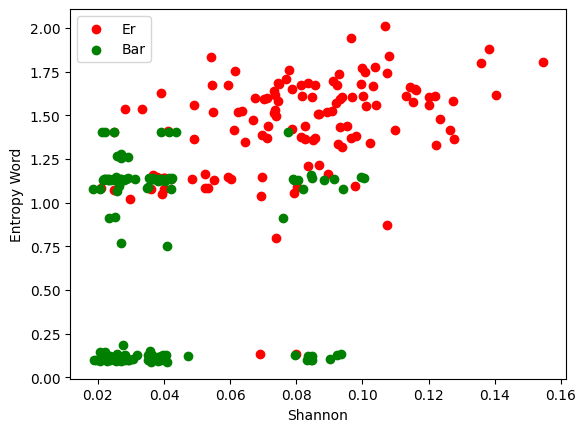

In [ ]:
l=125
plt.scatter(df["Shannon"][:l],df["Ew"][:l],c='r',label=df["Classes"][0])
plt.scatter(df["Shannon"][l:2*l],df["Ew"][l:2*l],c='g',label=df["Classes"][l])
#plt.scatter(df["Shannon"][2*l:3*l],df["Ew"][2*l:3*l],c='y',label=df["Classes"][2*l])
#plt.scatter(df["Shannon"][3*l:4*l],df["Ew"][3*l:4*l],c='k',label=df["Classes"][3*l])
plt.xlabel("Shannon")
plt.ylabel("Entropy Word")
plt.legend()
plt.show()

# Caminhada Aleat√≥ria


In [ ]:
class WalkSCAN:

    def __init__(self, nb_steps=2, eps=0.1, min_samples=3):
        self.nb_steps = nb_steps
        self.eps = eps
        self.min_samples = min_samples
        self.dbscan_ = DBSCAN(eps=self.eps, min_samples=self.min_samples)

    def load(self, graph, init_vector):
        self.graph = graph.copy()
        self.init_vector = init_vector.copy()

    def embed_nodes(self):
        p = {0: self.init_vector.copy()}
        for t in range(self.nb_steps):
            p[t + 1] = collections.defaultdict(int)
            for v in p[t]:
                for (_, w, e_data) in self.graph.edges(v, data=True):
                    if 'weight' in e_data:
                        self.weighted_ = True
                        p[t + 1][w] += float(e_data['weight']) / float(self.graph.degree(v, weight='weight')) * p[t][v]
                    else:
                        self.weighted_ = False
                        p[t + 1][w] += 1.0 / float(self.graph.degree(v)) * p[t][v]
        self.embedded_value_ = dict()
        self.embedded_nodes_ = list()
        for v in p[self.nb_steps]:
            self.embedded_nodes_.append(v)
            self.embedded_value_[v] = np.array([p[t + 1][v] for t in range(self.nb_steps)])
        self.nb_embedded_nodes_ = len(self.embedded_nodes_)

    def find_cores(self):
        if self.nb_embedded_nodes_ > 0:
            P = np.zeros((self.nb_embedded_nodes_, self.nb_steps))
            for (i, node) in enumerate(self.embedded_nodes_):
                P[i, :] = self.embedded_value_[node]
            self.dbscan_.fit(P)
            self.cores_ = collections.defaultdict(set)
            self.outliers_ = set()
            for (i, node) in enumerate(self.embedded_nodes_):
                label = self.dbscan_.labels_[i]
                if label >= 0:
                    self.cores_[label].add(node)
                else:
                    self.outliers_.add(node)
        else:
            self.cores_ = {}
            self.outliers_ = set()

    def compute_core_average_value(self):
        self.core_average_value_ = dict()
        for (core_id, core) in self.cores_.items():
            self.core_average_value_[core_id] = np.zeros(self.nb_steps)
            for node in core:
                for t in range(self.nb_steps):
                    self.core_average_value_[core_id][t] += self.embedded_value_[node][t] / float(len(core))

    def sort_cores(self):
        self.sorted_core_ids_ = self.cores_.keys()
        self.sorted_core_ids_ = list(self.sorted_core_ids_)
        self.sorted_core_ids_.sort(key=lambda i: list(self.core_average_value_[i]), reverse=True)
        self.sorted_cores_ = [self.cores_[i] for i in self.sorted_core_ids_]

    def aggregate_outliers(self):
        self.communities_ = list()
        for core in self.sorted_cores_:
            community = core.copy()
            for node in core:
                community |= set(nx.neighbors(self.graph, node)) & self.outliers_
            self.communities_.append(community)

    def detect_communities(self, graph, init_vector):
        self.load(graph, init_vector)
        self.embed_nodes()
        self.find_cores()
        self.compute_core_average_value()
        self.sort_cores()
        self.aggregate_outliers()

## Montando o Grafo do Brasil

Base de dados para o grafo: https://github.com/lcaldeira/GrafoBrasilCovid/tree/main/dados/gerado

Uma rede onde cada n√≥ representa uma cidade e a aresta umas representa umas das vias de locomo√ß√£o sendo ferrovia(FER), rodovia(ROD), hidrovia(HID), aeroporto(AER).

In [ ]:
GBC = GrafoBrasilCovid('/content/drive/MyDrive/csv/GrafoBrasilCovid-main/dados/gerado/')
GBC.load()


V, E = GBC.to_graph()
regions = {
    '*':  None,
    'N':  ['AC','AP','AM','PA','RO','RR','TO'],
    'NE': ['AL','BA','CE','MA','PB','PI','PE','RN','SE'],
    'CO': ['DF','GO','MT','MS'],
    'SE': ['ES','MG','RJ','SP'],
    'S':  ['PR','RS','SC']
}

# cria grafos diferentes para cada modal
pbar = tqdm(total=len(E)*len(regions), position=0, leave=True)
for i, m in enumerate(E):
    G = nx.Graph()
    G.add_nodes_from(V)
    nx.set_node_attributes(G, V)
    G.add_weighted_edges_from(E[m], malha=m)

    for r in regions:
        H = G.copy()
        if regions[r] is not None:
            H.remove_nodes_from([
                geocode for geocode in V
                if V[geocode]['estado'] not in regions[r]
            ])
        H = nx.relabel_nodes(H, { v: i+1 for i,v in enumerate(H.nodes()) })
        #Graph = GraphAPI(ig.Graph.from_networkx(H))

        #update_network_pool(pd.DataFrame({'group': 'transport','model': f'GrafoBrasilCovid','size': 'big','N': H.count_nodes()'K': np.round(2*H.count_edges() / H.count_nodes(), 2),'p': np.nan,'r': 1+i,
#'abbr': f'GBC[{m.lower()}]' + (f':{r}' if regions[r] is not None else ''),'graph': [ H ]}))
        pbar.update()

pbar.close()
#display(NETWORKS[ NETWORKS['group']=='transport' ])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:02<00:00, 12.34it/s]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/lista_rel.csv')
df1=df.drop(df[df['ROD']==False].index)
df1=df1.drop(['AER','FER','HID','ROD','FRO'],axis=1)

In [ ]:
Graph  = nx.from_pandas_edgelist(df1, 'geocodigo_1', 'geocodigo_2')

## Pagerank - Caminhada Aleat√≥ria
 Link do primeiro metodo:
https://medium.com/@gbrnc28/random-walk-method-page-rank-algorithm-using-networkx-7da8696ecc38#:~:text=Basically%20a%20random%20walk%20refers,of%20a%20list%20of%20nodes.

Um caminhante aleat√≥rio refere-se a come√ßar a partir de um n√≥ selecionado aleatoriamente de um conjunto de n√≥s dados, em seguida, escolher um vizinho dentre os n√≥s vizinhos para navegar e, ao percorrer a √°rea, manter um registro dos n√≥s percorridos em uma lista. Ele herda a propriedade de distribui√ß√£o de probabilidade, mas difere dela devido √† sua natureza de sele√ß√£o aleat√≥ria.

Algoritmo
- Inicialize todos os n√≥s com um valor de classifica√ß√£o inicial de 0.
- Selecione o n√≥ de partida aleatoriamente.
- Crie uma lista vazia para armazenar todos os vizinhos do n√≥ de partida.
- Agora, selecione o n√≥ da lista aleatoriamente e incremente o valor da classifica√ß√£o.
- Verifique se o n√≥ selecionado n√£o possui arestas de sa√≠da.

  -SE a condi√ß√£o acima for verdadeira, selecione o n√≥ do conjunto de n√≥s aleatoriamente e incremente o valor da classifica√ß√£o.

  -SEN√ÉO, selecione o n√≥ da lista que cont√©m todos os vizinhos aleatoriamente e incremente os valores de suas classifica√ß√µes.




In [ ]:
random_node = random.choice(list(Graph.nodes()))#escolhendo um n√≥ alet√≥rio
dict_counter = {} #iniciando todos os valores igual 0
for i in list(Graph.nodes()):
    dict_counter[i] = 0
dict_counter[random_node] = dict_counter[random_node]+1

#Atravesando os vizinhos dos no
for i in range(10**8):
    list_for_nodes = list(Graph.neighbors(random_node))
    if len(list_for_nodes)==0:# if random_node having no outgoing edges
        random_node = random.choice(list(Graph.nodes()))
        dict_counter[random_node] = dict_counter[random_node]+1

    else:
        random_node = random.choice(list_for_nodes) #escolhendo um n√≥ alet√≥rio
        dict_counter[random_node] = dict_counter[random_node]+1

# comparando com pagerank do networkx
rank_node = nx.pagerank(Graph)


sorted_rank = sorted(rank_node.items(),key=operator.itemgetter(1))
sorted_random_walk = sorted(dict_counter.items(),key=operator.itemgetter(1))
df=pd.DataFrame({"Pagerank":sorted_rank[-1::-1]
                ,"Random Walked":sorted_random_walk[-1::-1]})

df

Pagerank     Random Walked
0      (3550308, 0.0006161624635252366)  (3550308, 66140)
1      (3113404, 0.0005670925706280914)  (3113404, 61587)
2      (4203600, 0.0005061711519509352)  (2921708, 53122)
3      (1504208, 0.0004907000240964877)  (1504208, 52616)
4     (1702109, 0.00045452733059587574)  (3118403, 49450)
...                                 ...               ...
5549   (3123502, 6.020944049560004e-05)      (1505700, 0)
5550   (3556503, 5.885384973031102e-05)      (1502806, 0)
5551  (5218102, 5.8155650247052134e-05)      (1501808, 0)
5552  (3539905, 5.8004930406822735e-05)      (1500701, 0)
5553   (3118106, 5.761779598169194e-05)      (1500305, 0)

[5554 rows x 2 columns]

## WalkScan

link:https://github.com/ahollocou/walkscan

A ideia do WalkSCAN √© agrupar n√≥s que est√£o pr√≥ximos uns dos outros no espa√ßo de incorpora√ß√£o. Em particular, o WalkSCAN pode gerar v√°rias comunidades, possivelmente sobrepostas, e assim revelar a estrutura complexa de comunidades do grafo. Essas comunidades s√£o consideradas em ordem lexicogr√°fica reversa com base em seu valor m√©dio no espa√ßo de incorpora√ß√£o, sendo a primeira comunidade nessa ordem a mais relevante.

O algoritmo √© aplicado a um grafo G, um conjunto de sementes S, um limite de itera√ß√µes T e uma dist√¢ncia d. Primeiramente, √© calculado um vetor de caminhada aleat√≥ria p(v) para cada n√≥ v do grafo. Em seguida, √© criado um novo grafo G com base nos n√≥s que possuem valores de caminhada aleat√≥ria n√£o nulos. Os componentes conectados do grafo G s√£o determinados sendo adicionados n√≥s vizinhos isolados a cada comunidade. A seguir, √© calculada uma pontua√ß√£o $p^{j}$ para cada comunidade, e as comunidades s√£o retornadas em ordem lexicogr√°fica reversa com base nessas pontua√ß√µes.

In [ ]:
# utilizando a biblioteca WalkScan
ws = WalkSCAN(nb_steps=8, eps=0.05, min_samples=2)

init_vector = {random.choice(list(Graph.nodes())): 2,random.choice(list(Graph.nodes())): 7,random.choice(list(Graph.nodes())): 2,random.choice(list(Graph.nodes())): 5,random.choice(list(Graph.nodes())): 5 }

# Computando as comunidades
ws.detect_communities(Graph, init_vector)

for i in sorted(ws.communities_):
  print(i,'\n')

{3140506, 3151404, 3152006} 

{3152006, 3120904, 3125705, 3100203, 3146909} 

{3119203, 3140100, 3127701} 

{3127701, 3127305, 3122108, 3171501, 3165503} 

{3149952, 3161601, 3135076, 3127701, 3101805} 

{2210656, 2209906, 2208403, 2202406, 2206951, 2201945, 2201770, 2202604} 

{2200400, 2202737, 2202208, 3126307, 2205508, 3115102, 3152907, 3133758} 

{2202208, 2206753, 4201505, 4207205, 2202711, 2201945, 4206207} 

{4202800, 2202208, 2209906, 2200301, 4206207} 

{4218400, 4212403, 4218707, 4208807, 4217006} 

{3147907, 3536307, 3126307, 3516200, 3129707, 3115102} 

{3164704, 3143203, 3547908, 3126307, 3134806, 3501004} 

{3137536, 3170305, 2207751, 4202503, 4218905, 3100708, 3104809, 3522604, 3113008, 3526704, 3117108, 2203701, 3530805, 3121209, 3203130, 2306108, 3133501, 3539004, 3137601, 3543105, 3141702, 3145802, 4218954, 3149903, 3154002, 3162203, 3203163, 3166303, 3170404, 2302057, 2105450, 4202602, 3121258, 4210803, 4214904, 4219002, 3203205, 3170438, 3100807, 3518602, 3162252, 

# Classifica√ß√£o
Medidas das redes LLNA e classifica√ß√£o das redes


## Fun√ß√µes

In [ ]:
def shortest_path_probability(G, i, b):
    #print(list(nx.all_shortest_paths(G, source=i, target=b)))
    paths = list(nx.all_shortest_paths(G, source=i, target=b))
    neighbors = list(G.neighbors(i))
    ki = len(neighbors)
    soma_prob=0
    for path in paths:
      probability = 1.0 / ki
      for j in path:
          neighbors = list(G.neighbors(j))
          k = len(neighbors)
          if j != b:
            probability *= 1.0 / (k - 1)
      soma_prob+=probability
    return soma_prob


In [ ]:
def entropy(G, i, b):
    return -math.log2(shortest_path_probability(G,i,b))


In [ ]:
def entropy_total(G):
  S=0
  u=G.nodes()
  for i in u:
    for j in u:
      S+=entropy(G,i,j)
  return S/len(u)**2


In [ ]:
def vulnerability(G):
  vet=[]
  norm=nx.global_efficiency(G)
  for u in G.nodes():
      Aux = nx.Graph()
      Aux.add_nodes_from(G.nodes())
      Aux.add_edges_from(G.edges())
      Aux.remove_node(u)
      a=(norm-nx.global_efficiency(Aux))/norm
      vet.append(a)
  return max(vet)


In [ ]:
def cyclic_coefficient(G):
    cyclic_coeffs = []
    for i in G.nodes():
        if G.degree(i) >= 2:
            neighbors = list(G.neighbors(i))
            n = len(neighbors)
            s = 0
            for j in range(n):
                for k in range(j+1, n):
                    if G.has_edge(neighbors[j], neighbors[k]):
                        Sijk = 3
                    else:
                        try:
                            Sijk = nx.shortest_path_length(G, source=neighbors[j], target=neighbors[k])
                        except:
                            Sijk = float('inf')
                    s += 1/Sijk
            cyclic_coeffs.append(s/(n*(n-1)))
    return sum(cyclic_coeffs)/len(cyclic_coeffs)

In [ ]:
def momentum(G):
  adj_matrix = nx.to_numpy_array(G)
  # Calcula os autovalores da matriz de adjac√™ncia
  eigenvalues = np.linalg.eigvals(adj_matrix)
  return np.real(np.sum(eigenvalues**2)/len(eigenvalues))


## Gerando as m√©tricas



Utilizamos 4 m√©tricas que mais poderia caracterizar cada rede.

- Ciclico
- Correla√ß√£o de Graus
- Bipartividade
- Momento

### Ciclico

In [ ]:
import os
ciclo_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          ciclo_Bar.append(cyclic_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
ciclo_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          ciclo_Er.append(cyclic_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
ciclo_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          ciclo_Ge.append(cyclic_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
ciclo_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          ciclo_Wa.append(cyclic_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

### Distribui√ß√£o de graus e correla√ß√µes


In [ ]:
import os
pearson_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          pearson_Bar.append(nx.degree_pearson_correlation_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
pearson_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          pearson_Er.append(nx.degree_pearson_correlation_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
pearson_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          pearson_Ge.append(nx.degree_pearson_correlation_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
pearson_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          pearson_Wa.append(nx.degree_pearson_correlation_coefficient(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

### Bipartividade

In [ ]:
import os
bipar_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          bipar_Bar.append(nx.algorithms.bipartite.spectral_bipartivity(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
bipar_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          bipar_Er.append(nx.algorithms.bipartite.spectral_bipartivity(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
bipar_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          bipar_Ge.append(nx.algorithms.bipartite.spectral_bipartivity(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
bipar_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          bipar_Wa.append(nx.algorithms.bipartite.spectral_bipartivity(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

### Momento

In [ ]:
import os
mome_Bar=[]
Path = "/content/drive/MyDrive/csv/T4/Barabasi/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          mome_Bar.append(momentum(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
mome_Er=[]
Path = "/content/drive/MyDrive/csv/T4/Erdos/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          mome_Er.append(momentum(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
mome_Ge=[]
Path = "/content/drive/MyDrive/csv/T4/Geo/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          mome_Ge.append(momentum(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

In [ ]:
import os
mome_Wa=[]
Path = "/content/drive/MyDrive/csv/T4/Watts/"
filelist = os.listdir(Path)
for i in filelist:
    if i.endswith(".txt"):  # You could also add "and i.startswith('f')
        with open(Path + i, 'rb') as f:
          G= nx.read_adjlist(f,create_using=nx.Graph())
          f.close()
          mome_Wa.append(momentum(G))
            #for line in f:
                # Here you can check (with regex, if, or whatever if the keyword is in the document.)

## Criando o dataframe

In [ ]:
Vulne_nl1=[0]*10
Vulne_nl2=[0]*10
color=[3]*len(ciclo_Er)+[4]*len(ciclo_Bar)+[5]*len(ciclo_Ge)+[6]*len(ciclo_Wa)
classes=['Er']*len(ciclo_Er)+['Bar']*len(ciclo_Bar)+['Geo']*len(ciclo_Ge)+['Wat']*len(ciclo_Wa)

df=pd.DataFrame({"Color":color
                ,"Classes":classes
                ,"Ciclico":ciclo_Er+ciclo_Bar+ciclo_Ge+ciclo_Wa
                ,"Pearson":pearson_Er+pearson_Bar+pearson_Ge+pearson_Wa
                ,"Momentum":mome_Er+mome_Bar+mome_Ge+mome_Wa
                ,"Bipartividade":bipar_Er+bipar_Bar+bipar_Ge+bipar_Wa})

In [ ]:
Vulne_nl1=[0]*10
Vulne_nl2=[0]*10
color=[0]*len(ciclo_Er)+[1]*len(ciclo_Bar)+[2]*len(ciclo_Ge)+[3]*len(ciclo_Wa)
classes=['Er']*len(ciclo_Er)+['Bar']*len(ciclo_Bar)+['Geo']*len(ciclo_Ge)+['Wat']*len(ciclo_Wa)

In [ ]:
df

Color Classes   Ciclico   Pearson  Momentum  Bipartividade
0        3      Er  0.249016 -0.009938  4.011881       0.976207
1        3      Er  0.249134 -0.004438  4.134653       0.970436
2        3      Er  0.249463  0.014963  4.011881       0.978922
3        3      Er  0.249071 -0.009382  4.027723       0.971053
4        3      Er  0.249786  0.040136  4.198020       0.979411
..     ...     ...       ...       ...       ...            ...
495      6     Wat  0.229162  0.004198  3.968379       0.822319
496      6     Wat  0.227508  0.067199  3.968379       0.811502
497      6     Wat  0.224682 -0.006308  3.968379       0.794982
498      6     Wat  0.227475  0.079897  3.968379       0.809901
499      6     Wat  0.226393  0.002859  3.968379       0.803218

[500 rows x 6 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/csv/T4/out2.csv')#salvando o dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/T4/out2.csv')#lendo caso n√£o queira rodar a parte anterior

# Scatter

Scatter plot com as m√©tricas que melhor defini cada rede.

In [ ]:
l=125

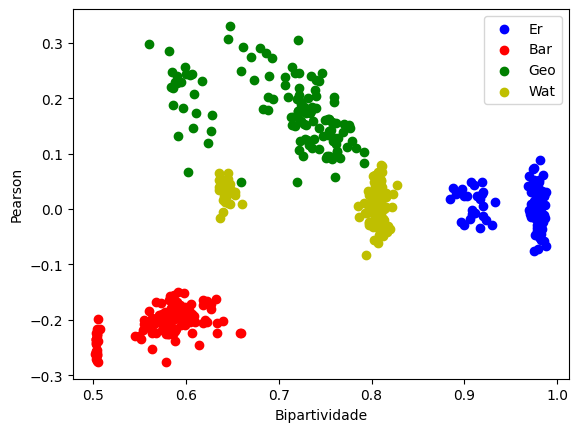

In [ ]:
plt.scatter(df["Bipartividade"][:l],df["Pearson"][:l],c='b',label=df["Classes"][0])
plt.scatter(df["Bipartividade"][l:2*l],df["Pearson"][l:2*l],c='r',label=df["Classes"][l])
plt.scatter(df["Bipartividade"][2*l:3*l],df["Pearson"][2*l:3*l],c='g',label=df["Classes"][2*l])
plt.scatter(df["Bipartividade"][3*l:4*l],df["Pearson"][3*l:4*l],c='y',label=df["Classes"][3*l])
plt.xlabel("Bipartividade")
plt.ylabel("Pearson")
plt.legend()
plt.show()

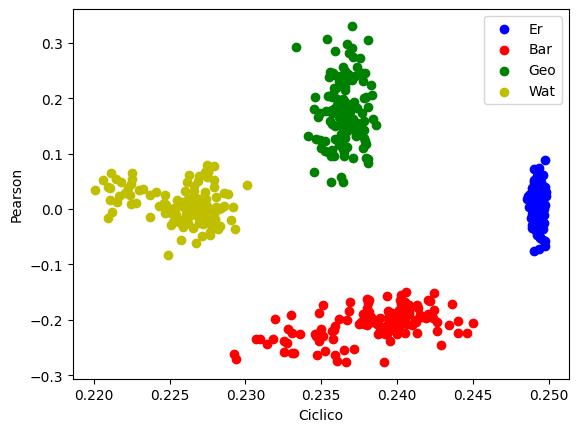

In [ ]:
plt.scatter(df["Ciclico"][:l],df["Pearson"][:l],c='b',label=df["Classes"][0])
plt.scatter(df["Ciclico"][l:2*l],df["Pearson"][l:2*l],c='r',label=df["Classes"][l])
plt.scatter(df["Ciclico"][2*l:3*l],df["Pearson"][2*l:3*l],c='g',label=df["Classes"][2*l])
plt.scatter(df["Ciclico"][3*l:4*l],df["Pearson"][3*l:4*l],c='y',label=df["Classes"][3*l])
plt.xlabel("Ciclico")
plt.ylabel("Pearson")
plt.legend()
plt.show()

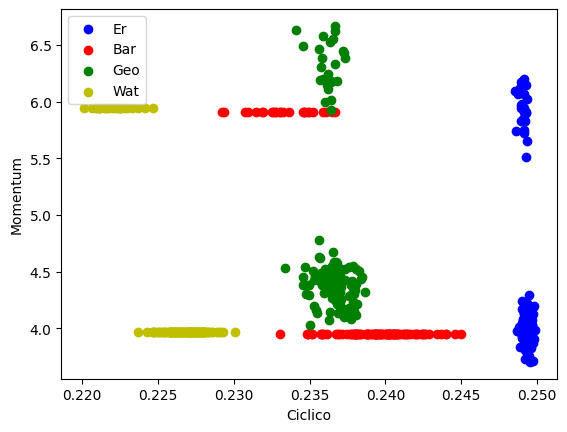

In [ ]:
plt.scatter(df["Ciclico"][:l],df["Momentum"][:l],c='b',label=df["Classes"][0])
plt.scatter(df["Ciclico"][l:2*l],df["Momentum"][l:2*l],c='r',label=df["Classes"][l])
plt.scatter(df["Ciclico"][2*l:3*l],df["Momentum"][2*l:3*l],c='g',label=df["Classes"][2*l])
plt.scatter(df["Ciclico"][3*l:4*l],df["Momentum"][3*l:4*l],c='y',label=df["Classes"][3*l])
plt.xlabel("Ciclico")
plt.ylabel("Momentum")
plt.legend()
plt.show()

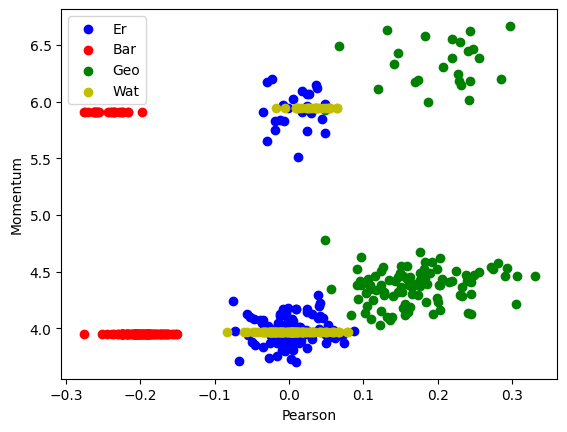

In [ ]:
plt.scatter(df["Pearson"][:l],df["Momentum"][:l],c='b',label=df["Classes"][0])
plt.scatter(df["Pearson"][l:2*l],df["Momentum"][l:2*l],c='r',label=df["Classes"][l])
plt.scatter(df["Pearson"][2*l:3*l],df["Momentum"][2*l:3*l],c='g',label=df["Classes"][2*l])
plt.scatter(df["Pearson"][3*l:4*l],df["Momentum"][3*l:4*l],c='y',label=df["Classes"][3*l])
plt.xlabel("Pearson")
plt.ylabel("Momentum")
plt.legend()
plt.show()

## Classifica√ß√£o de rede

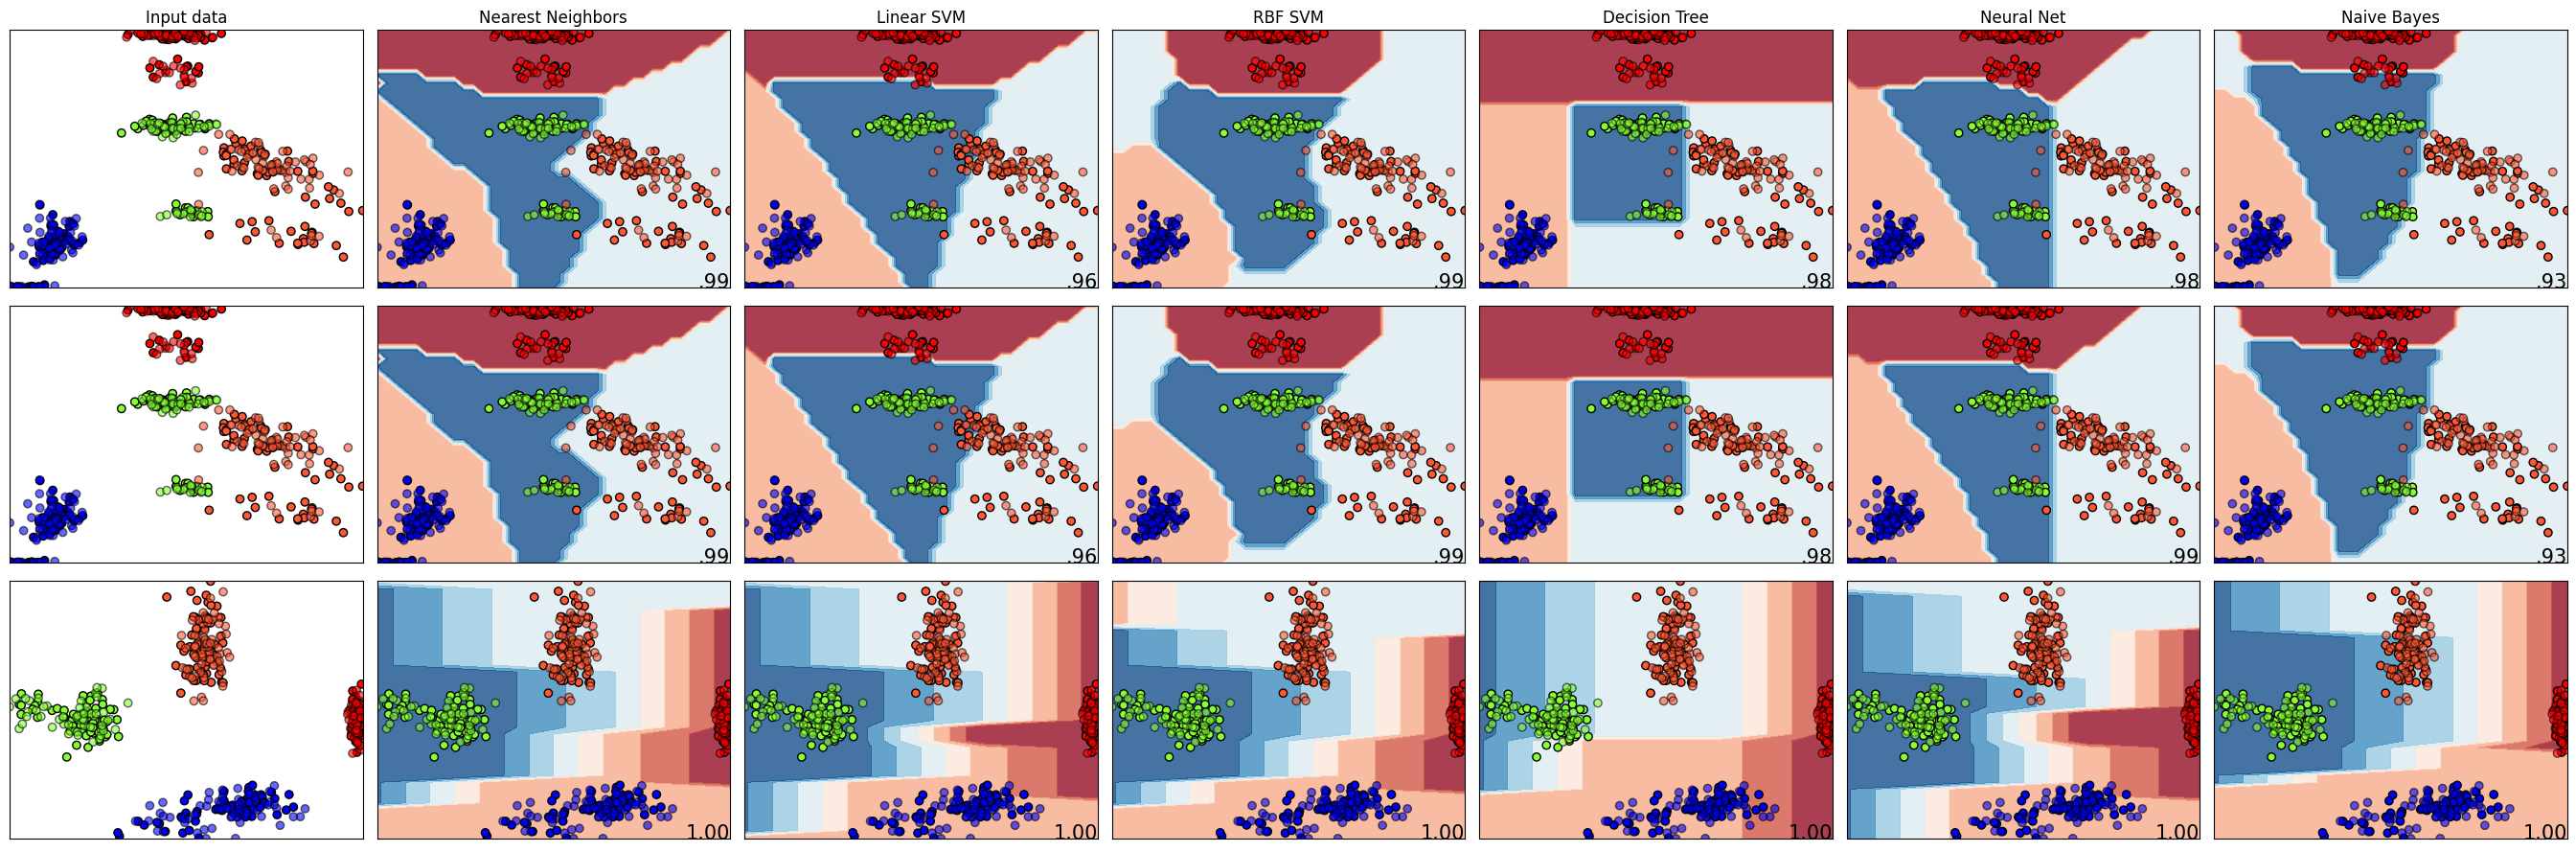

In [ ]:


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Neural Net",
    "Naive Bayes",
    ]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
]

L_dataset = []
L_classifier = []
L_accuracy = []
L_precision = []
L_recall = []
L_f1 = []
L_f1_macro = []

y=np.array(color)
data1=pd.DataFrame({"Pearson":pearson_Er+pearson_Bar+pearson_Ge+pearson_Wa
                    ,"Bipartividade":bipar_Er+bipar_Bar+bipar_Ge+bipar_Wa}).to_numpy()
data2=pd.DataFrame({"Ciclico":ciclo_Er+ciclo_Bar+ciclo_Ge+ciclo_Wa
                ,"Pearson":pearson_Er+pearson_Bar+pearson_Ge+pearson_Wa}).to_numpy()

data3=pd.DataFrame({"Ciclico":ciclo_Er+ciclo_Bar+ciclo_Ge+ciclo_Wa
                ,"Bipartividade":bipar_Er+bipar_Bar+bipar_Ge+bipar_Wa}).to_numpy()
datasets=[[data1,y],[data1,y],[data2,y]]

figure = plt.figure(figsize=(27, 9))
i = 1
# itera√ß√µes sobre os datasets
for ds_cnt, ds in enumerate(datasets):
    # separando os datasets
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=11371311
    )

    x_min, x_max = X[:, 0].min() , X[:, 0].max()
    y_min, y_max = X[:, 1].min() , X[:, 1].max()

    # configura√ß√µes dos plots
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF','#FF5733','#83FF33'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plottando o treino e teste
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # itera√ß√µes sobre os classificadores
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        L_dataset.append(ds_cnt)
        L_classifier.append(name)
        L_accuracy.append(accuracy_score(y_test,y_pred))
        L_precision.append(precision_score(y_test,y_pred,average="micro"))
        L_recall.append(recall_score(y_test,y_pred,average="micro"))
        L_f1.append(f1_score(y_test,y_pred,average="micro"))
        L_f1_macro.append(f1_score(y_test,y_pred,average="macro"))
        # plot sobre o treino e o teste
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max ,
            y_min,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:

#vendo resultado
df = pd.DataFrame()
df['dataset'] = L_dataset
df['classifier'] = L_classifier
df['accuracy'] = L_accuracy
df['precision'] = L_precision
df['recall'] = L_recall
df['f1'] = L_f1
df['f1-macro'] = L_f1_macro

df

dataset         classifier  accuracy  precision  recall     f1  f1-macro
0         0  Nearest Neighbors     0.992      0.992   0.992  0.992  0.991272
1         0         Linear SVM     0.956      0.956   0.956  0.956  0.952898
2         0            RBF SVM     0.988      0.988   0.988  0.988  0.986921
3         0      Decision Tree     0.984      0.984   0.984  0.984  0.982544
4         0         Neural Net     0.984      0.984   0.984  0.984  0.982544
5         0        Naive Bayes     0.932      0.932   0.932  0.932  0.927684
6         1  Nearest Neighbors     0.992      0.992   0.992  0.992  0.991272
7         1         Linear SVM     0.956      0.956   0.956  0.956  0.952898
8         1            RBF SVM     0.988      0.988   0.988  0.988  0.986921
9         1      Decision Tree     0.984      0.984   0.984  0.984  0.982544
10        1         Neural Net     0.988      0.988   0.988  0.988  0.986921
11        1        Naive Bayes     0.932      0.932   0.932  0.932  0.927684
12        2  Nearest Neighbors     1.000      1.000   1.000  1.000  1.000000
13        2         Linear SVM     1.000      1.000   1.000  1.000  1.000000
14        2            RBF SVM     1.000      1.000   1.000  1.000  1.000000
15        2      Decision Tree     0.996      0.996   0.996  0.996  0.995619
16        2         Neural Net     1.000      1.000   1.000  1.000  1.000000
17        2        Naive Bayes     1.000      1.000   1.000  1.000  1.000000

### Conclus√£o

Podemos v√™ que o melhor caso √© C√≠clico e o Bipartido tendo aproximado de 100% de acerto, outros datasets s√£o pr√≥ximos de 100%.

## Classifica√ß√£o de n√≥

Colocamos duas t√©cnicas para classificar n√≥, o primeiro √© para encontrar comunidade atraves de uma classifica√ß√£o e o segundo DeepWalk atr√°ves de caminha aleat√≥ria classificar o n√≥.

### DeepWalk
Algoritmo
- O gerador de caminhada aleat√≥ria seleciona de forma aleat√≥ria e uniforme um v√©rtice vi como raiz do caminho aleat√≥rio $W_{vi}$, a partir de um grafo G. O caminho percorre de forma aleat√≥ria os vizinhos do √∫ltimo v√©rtice visitado at√© alcan√ßar o comprimento m√°ximo (t).
- O modelo Skip-gram itera sobre todas as poss√≠veis combina√ß√µes de palavras em um caminho aleat√≥rio que estejam dentro de uma janela w. Para cada combina√ß√£o, √© mapeado cada v√©rtice $v_j$ para o seu vetor de representa√ß√£o atual Œ¶(vj) ‚àà $R^d$.
- Com base na representa√ß√£o de $v_j$, o objetivo √© maximizar a probabilidade de ocorr√™ncia de seus vizinhos no caminho . Essa distribui√ß√£o posterior pode ser aprendida usando diferentes tipos de classificadores.


In [24]:

# imports
import networkx as nx

import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json


from scipy.linalg import sqrtm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from karateclub.utils.walker import RandomWalker, BiasedRandomWalker
from karateclub import DeepWalk, Node2Vec
from gensim.models.word2vec import Word2Vec


In [38]:
G = nx.karate_club_graph()  # carregando os grafos

clubs = []  # lista de popula√ß√£o
for n in G.nodes:
    c = G.nodes[n]['club']
    clubs.append(1 if c == 'Officer' else 0) # adicionando

canvas = jupyter_canvas()

canvas.nodes(G.nodes).add(color="orange")
canvas.edges(G.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "2": {"color":‚Ä¶

In [39]:
model = DeepWalk(dimensions=124)  # algoritmo de incorpora√ß√£o de n√≥s
model.fit(G)  # fit
embedding = model.get_embedding()  # extra√ß√£o de incorpora√ß√£o

print('Number of karate club members:', len(G.nodes))
print('Embedding array shape:', embedding.shape)

Number of karate club members: 34
Embedding array shape: (34, 124)


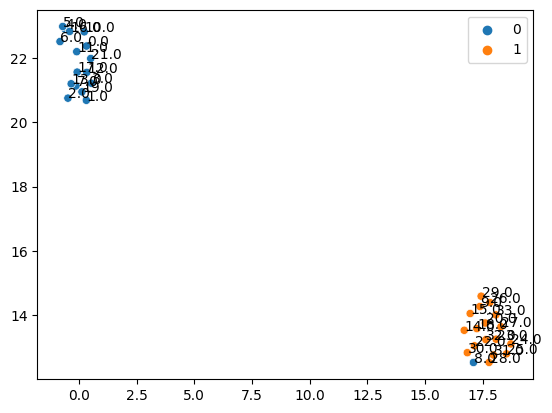

In [27]:
u = umap.UMAP(random_state=42)
umap_embs = u.fit_transform(embedding)

ax = sns.scatterplot(x = umap_embs[:, 0], y = umap_embs[:, 1], hue = clubs)
a = pd.DataFrame({'x': umap_embs[:, 0], 'y': umap_embs[:, 1], 'val': G.nodes})
for i, point in a.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['val']))